<a href="https://colab.research.google.com/github/abhyudaymishra/Email-Campaign--Effectiveness-CS3/blob/main/Abhyuday_Email_Campaign_Effectiveness_CS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Email Campaign Effectiveness Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Abhyuday Mishra


# **Project Summary -**

Email marketing has become an essential tool for small and medium-sized businesses to keep their customers informed about their products, services, and updates. However, sometimes emails are ignored due to various reasons such as improper structure, excessive images or links, complex vocabulary, or length. In this context, the objective of this project was to develop machine learning models that can predict if an email will be ignored, read, or acknowledged and identify the important features that prevent an email from being ignored.

The exploratory data analysis (EDA) revealed that different email campaign types have varying levels of email engagement, with Campaign Type 1 having a high likelihood of being read despite fewer emails sent, while Campaign Type 2 was mostly ignored despite more emails being sent. Moreover, an average word count of 600, a subject hotness score of 0.6, and an average of 10 links and 3 images in email content lead to a better engagement rate. Distribution plots showed that Word Count follows a normal distribution, while Total Links and Total Images are positively skewed with the presence of outliers. The correlation matrix supports earlier observations, suggesting positive correlations between Email Campaign Type and Total Past Communications with email engagement, and negative correlations between Word Count and Subject Hotness Score with email engagement.

The machine learning models employed in the project were Logistic Regression, Decision Tree, Random Forest, and XG Boost. The evaluation results showed that the XG boost on the SMOTE data performed the best with an F1 score of 0.80 on the test set. This model was able to correctly classify the majority class (class 0) with high precision and recall while also improving the performance on the minority classes (class 1 and class 2) compared to the other models.

Based on the EDA and model evaluations, some recommendations were made. Email Marketing Campaign Types 1 and 3 performed better than type 2, so concentrating on improving type 2 may suffice. The word count should be appropriate, with content that is concise and to the point, with a few marketing gimmicks thrown in for good measure. Keeping the number of images and links to a minimum is also recommended. It was observed that total previous communications had a positive influence, so having a healthy relationship with customers is crucial.

Overall, the project highlighted the importance of email marketing in building relationships with leads and customers. It also demonstrated the potential of machine learning models in predicting email engagement and identifying the factors that prevent an email from being ignored. The recommendations provided can be useful for small to medium business owners who rely on email marketing strategies to stay in business.

However, it is important to note that the performance of the models can still be improved. The low F1 scores for the minority classes indicate that the models may not be effective in predicting engagement for all customers. It may be worthwhile to investigate other machine learning techniques, such as deep learning, to improve the model's performance. Additionally, collecting more data and including more features related to customer behavior and preferences may also improve the model's performance.

at last, this project successfully developed machine learning models to predict email engagement and identified the important features that prevent an email from being ignored. The recommendations based on the EDA and model evaluations can help small and medium-sized businesses to improve their email marketing strategies and increase customer engagement.

# **GitHub Link -**

## https://github.com/abhyudaymishra/Email-Campaign--Effectiveness-CS3

# **Problem Statement**


*Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.*

*Email marketing is a technique used by businesses to keep their customers informed about their new products, updates, and important notices through email. It helps in building relationships with leads, new and past customers by allowing businesses to communicate directly with them in their inbox at their convenience. However, sometimes emails are ignored due to various reasons like improper structure, too many images or links, complex vocabulary or length. In this project, we aim to develop machine learning models that can predict if an email will be ignored, read or acknowledged, and identify the important features that prevent an email from being ignored.*

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Importing important libraries and modules
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')
#Importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE



### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the csv dataset
ds_email = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_email_campaign.csv')

### Dataset First View

In [4]:
#first five rows 
ds_email.head()

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                    2.2                  2   
1  EMA00081000045360           2                    2.1                  1   
2  EMA00081000066290           2                    0.1                  1   
3  EMA00081000076560           1                    3.0                  2   
4  EMA00081000109720           1                    0.0                  2   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                       33.0   
1               NaN                    2                       15.0   
2                 B                    3                       36.0   
3                 E                    2                       25.0   
4                 C                    3                       18.0   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1         440          8.0           0.0   
1                         2         504          5.0           0.0   
2                         2         962          5.0           0.0   
3                         2         610         16.0           0.0   
4                         2         947          4.0           0.0   

   Email_Status  
0             0  
1             0  
2             1  
3             0  
4             0

In [5]:
#last five rows
ds_email.tail()

Email_ID  Email_Type  Subject_Hotness_Score  \
68348  EMA00089995974500           2                    0.4   
68349  EMA00089998225300           1                    1.3   
68350  EMA00089998436500           1                    2.2   
68351  EMA00089999168800           1                    0.4   
68352  EMA00089999316900           1                    1.5   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
68348                  1                 F                    2   
68349                  1                 C                    2   
68350                  2               NaN                    2   
68351                  1                 E                    2   
68352                  1                 G                    2   

       Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
68348                       22.0                         3         737   
68349                       40.0                         2         653   
68350                       33.0                         2         490   
68351                       50.0                         1         733   
68352                       20.0                         2        1038   

       Total_Links  Total_Images  Email_Status  
68348         16.0          13.0             0  
68349         31.0          16.0             0  
68350          9.0           0.0             0  
68351         14.0           4.0             0  
68352          6.0           0.0             0

### Dataset Rows & Columns count

In [6]:
#No. of rows and columns in the dataset
ds_email.shape

(68353, 12)

### Dataset Information

In [7]:
ds_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [8]:
#checking for the duplicate values
ds_email.duplicated().value_counts()

False    68353
dtype: int64

#### Missing Values/Null Values

In [9]:
#checking if there are any null values in the dataset
ds_email.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

*Several columns in our dataset, including Customer Location, Total Past Communications, Total Links, and Total Images, have a significant number of missing values. While it may be challenging to simply fill in the missing values for the categorical column of Customer Location with our assumptions, we will investigate its correlation with our target variable to determine its impact. In the meantime, we can fill in the missing values for the other columns.*

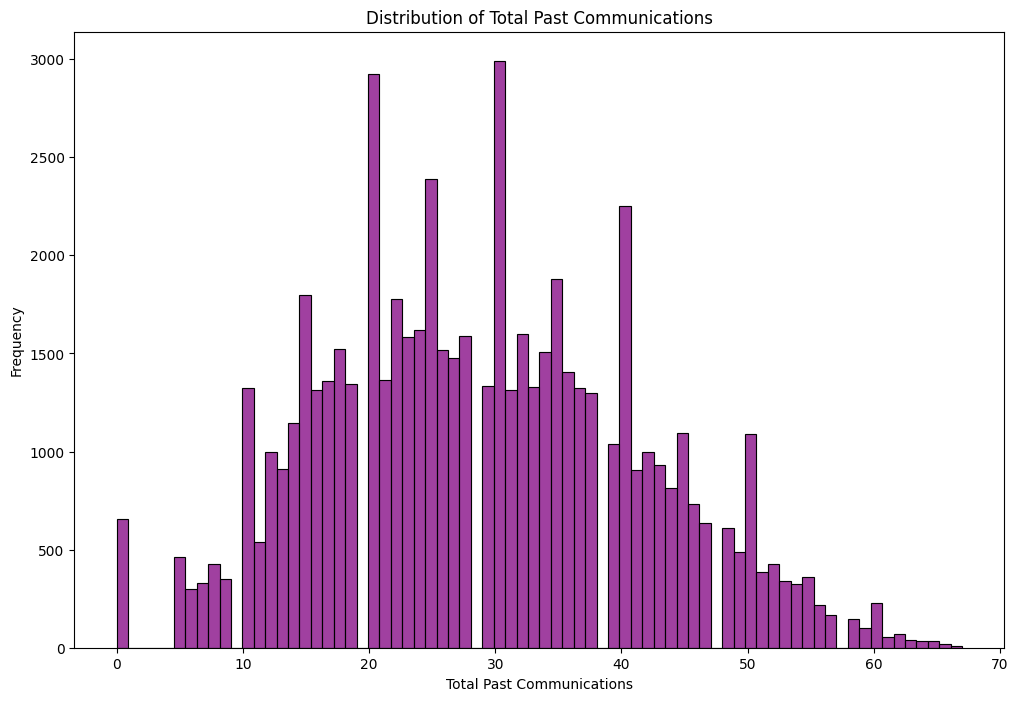

In [10]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
plt.figure(figsize=(12, 8))
sns.histplot(data=ds_email, x='Total_Past_Communications', color='purple')
plt.title('Distribution of Total Past Communications')
plt.xlabel('Total Past Communications')
plt.ylabel('Frequency')
plt.show()


In [11]:
#filling up the null values for total past comm
ds_email['Total_Past_Communications'].fillna(ds_email['Total_Past_Communications'].mean(), inplace = True)

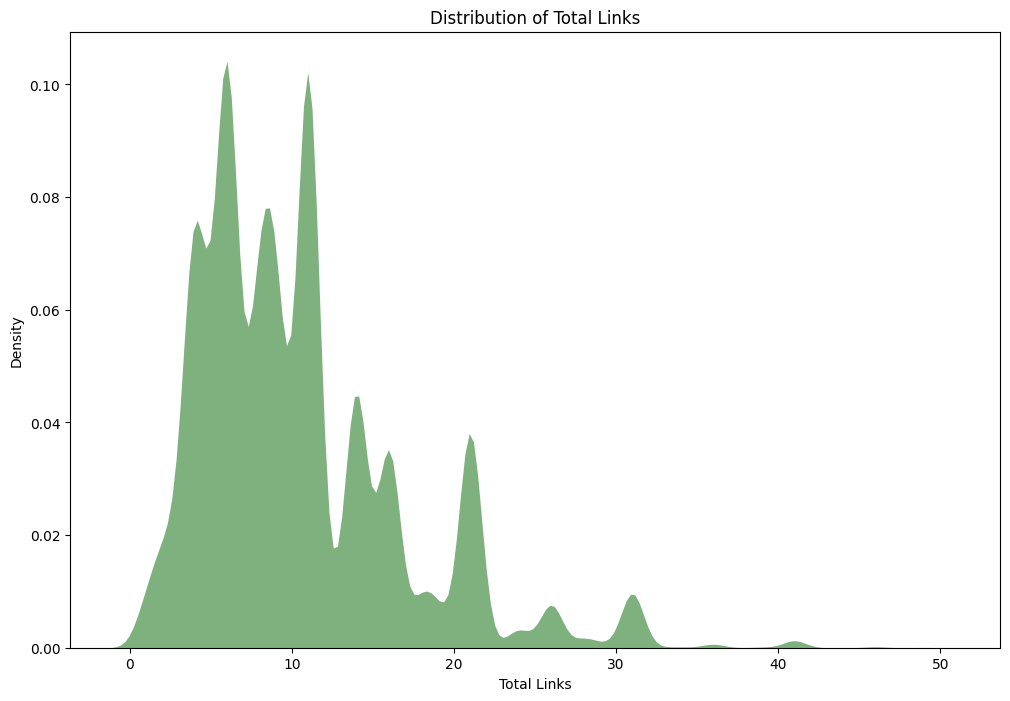

In [12]:
##Let's look at the Total Links distribution to see where the majority of the data is going so we can fill it appropriately.
plt.figure(figsize=(12, 8))
sns.kdeplot(data=ds_email, x='Total_Links', fill=True, color='darkgreen', alpha=0.5, linewidth=0)
plt.title('Distribution of Total Links')
plt.xlabel('Total Links')
plt.ylabel('Density')
plt.show()


In [13]:
#filling up the Total Links Column
ds_email['Total_Links'].fillna(ds_email['Total_Links'].mode()[0], inplace = True)

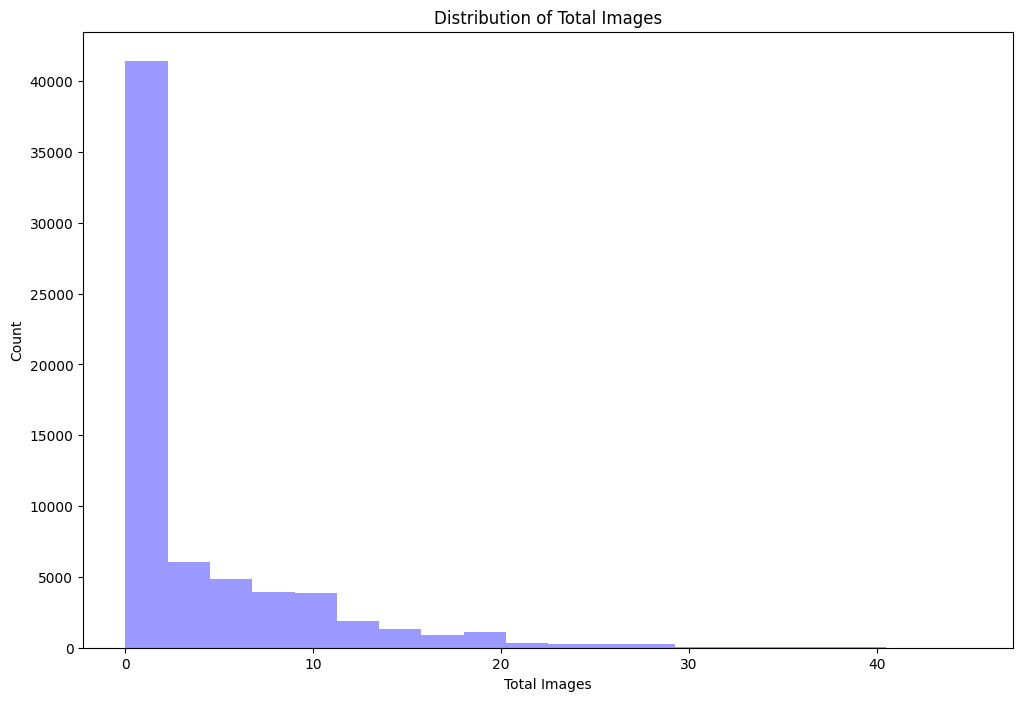

In [13]:
#total image visulization
plt.figure(figsize=(12, 8))
sns.distplot(ds_email['Total_Images'].dropna(), kde=False, color='blue', bins=20)
plt.title('Distribution of Total Images')
plt.xlabel('Total Images')
plt.ylabel('Count')
plt.show()



In [14]:
#filling up the Total Images Column
ds_email['Total_Images'].fillna(ds_email['Total_Images'].mode()[0], inplace = True)

In [15]:
#checking if there are any null values in the dataset
ds_email.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                     0
Email_Status                     0
dtype: int64

### What did you know about your dataset?

*The dataset consists of 68353 Rows and 12 cOlumns, including integer, float, and object data types. All values in the dataset are unique, indicating that there are no duplicates that could potentially bias downstream analyses or hinder accurate data summarization. However, some features such as Customer Location (with 11595 null values, representing 16% of the dataset), Total Past Communication (with 6825 null values, or 10%), Total Links (with 2201 null values, or 3%), and Total Images (with 1677 null values, or 2%) have missing values.*

## ***2. Understanding Your Variables***

In [16]:
#checking the Name of columns 
ds_email.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [17]:
ds_email.describe()

Email_Type  Subject_Hotness_Score  Email_Source_Type  \
count  68353.000000           68353.000000       68353.000000   
mean       1.285094               1.095481           1.456513   
std        0.451462               0.997578           0.498109   
min        1.000000               0.000000           1.000000   
25%        1.000000               0.200000           1.000000   
50%        1.000000               0.800000           1.000000   
75%        2.000000               1.800000           2.000000   
max        2.000000               5.000000           2.000000   

       Email_Campaign_Type  Total_Past_Communications  \
count         68353.000000               68353.000000   
mean              2.272234                  28.933250   
std               0.468680                  11.894171   
min               1.000000                   0.000000   
25%               2.000000                  20.000000   
50%               2.000000                  28.933250   
75%               3.000000                  37.000000   
max               3.000000                  67.000000   

       Time_Email_sent_Category    Word_Count   Total_Links  Total_Images  \
count              68353.000000  68353.000000  66152.000000  68353.000000   
mean                   1.999298    699.931751     10.429526      3.463564   
std                    0.631103    271.719440      6.383270      5.555121   
min                    1.000000     40.000000      1.000000      0.000000   
25%                    2.000000    521.000000      6.000000      0.000000   
50%                    2.000000    694.000000      9.000000      0.000000   
75%                    2.000000    880.000000     14.000000      5.000000   
max                    3.000000   1316.000000     49.000000     45.000000   

       Email_Status  
count  68353.000000  
mean       0.230934  
std        0.497032  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        2.000000

### Variables Description 


* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count**- Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status**- Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for i in ds_email.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, ds_email[i].nunique()))

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 65.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
#Creating a copy of the current dataset
df_mail = ds_email.copy()

In [20]:
#Counting the number of emails that are Read, Acknowledged, and Ignored
num_read = df_mail[df_mail['Email_Status'] == 1]['Email_Status'].count()
num_acknowledged = df_mail[df_mail['Email_Status'] == 2]['Email_Status'].count()
num_ignored = df_mail[df_mail['Email_Status'] == 0]['Email_Status'].count()

In [21]:
#Printing the count of each email status
print(f"No. of Email Read : - {num_read}")
print(f"No. of Email Acknowledged : - {num_acknowledged}")
print(f"No. of Email Ignored : - {num_ignored}")

No. of Email Read : - 11039
No. of Email Acknowledged : - 2373
No. of Email Ignored : - 54941


In [22]:
# Email Status groupby Email_Type
email_type_status = pd.DataFrame(df_mail.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))
print(email_type_status)

# Email Status groupby Email_Source_Type
email_source_type_status = pd.DataFrame(df_mail.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))
print(email_source_type_status)

# Email Status groupby Customer_Location
customer_loc_status = pd.DataFrame(df_mail.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))
print(customer_loc_status)

# Email Status groupby Email_Campaign_Type
email_campaign_type_status = pd.DataFrame(df_mail.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))
print(email_campaign_type_status)

# Email Status groupby Time_Email_sent_Category
time_email_sent_status = pd.DataFrame(df_mail.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))
print(time_email_sent_status)



   Email_Type  Email_Status  Count
0           1             0  39004
1           1             1   8208
2           1             2   1654
3           2             0  15937
4           2             1   2831
5           2             2    719
   Email_Source_Type  Email_Status  Count
0                  1             0  29577
1                  1             1   6150
2                  1             2   1422
3                  2             0  25364
4                  2             1   4889
5                  2             2    951
   Customer_Location  Email_Status  Count
0                  A             0   1160
1                  A             1    245
2                  A             2     49
3                  B             0   3502
4                  B             1    714
5                  B             2    125
6                  C             0   4654
7                  C             1    890
8                  C             2    214
9                  D             0   5950

In [23]:
#creating variable to store numerical feature
numerical_feature = df_mail.select_dtypes(include = 'float').columns.to_list()
numerical_feature.append('Word_Count')
numerical_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [24]:
#creating variable to store categorial features
categorical_feature = [feature for feature in df_mail.columns.to_list() if feature not in numerical_feature]
categorical_feature  

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [25]:
#Computing count, sum, mean and median based on Email Type
num_feature = ['Total_Past_Communications', 'Total_Links', 'Total_Images']
result = df_mail.groupby('Email_Type')[num_feature].agg(['count', 'sum', 'mean', 'median']).T
print(result)

Email_Type                                   1              2
Total_Past_Communications count   4.886600e+04   19487.000000
                          sum     1.430184e+06  547490.897803
                          mean    2.926746e+01      28.095186
                          median  2.893325e+01      28.933250
Total_Links               count   4.728600e+04   18866.000000
                          sum     5.241490e+05  165785.000000
                          mean    1.108466e+01       8.787501
                          median  9.000000e+00       8.000000
Total_Images              count   4.886600e+04   19487.000000
                          sum     1.875460e+05   49199.000000
                          mean    3.837965e+00       2.524709
                          median  0.000000e+00       0.000000


In [26]:
#finding count, sum, mean and median based on Email_Source_Type
df_mail.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T
#finding count, sum, mean and median based on Customer_Location
df_mail.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

print(df_mail.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T)
print(df_mail.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T)


Email_Source_Type                            1              2
Total_Past_Communications count   3.714900e+04   31204.000000
                          sum     1.101683e+06  875991.813955
                          mean    2.965578e+01      28.073062
                          median  2.893325e+01      28.933250
Total_Links               count   3.595000e+04   30202.000000
                          sum     3.628040e+05  327130.000000
                          mean    1.009191e+01      10.831402
                          median  9.000000e+00       9.000000
Total_Images              count   3.714900e+04   31204.000000
                          sum     1.214220e+05  115323.000000
                          mean    3.268513e+00       3.695776
                          median  0.000000e+00       0.000000
Customer_Location                            A              B              C  \
Total_Past_Communications count    1454.000000    4341.000000    5758.000000   
                          sum     

In [27]:
#finding count, sum, mean and median based on Email_Campaign_Type
df_mail.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T
#finding count, sum, mean and median based on Time_Email_sent_Category
df_mail.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T
print(df_mail.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T)
print(df_mail.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T)


Email_Campaign_Type                         1             2              3
Total_Past_Communications count    736.000000  4.827300e+04   19344.000000
                          sum     2285.726742  1.304756e+06  670632.970810
                          mean       3.105607  2.702869e+01      34.668785
                          median     0.000000  2.800000e+01      34.000000
Total_Links               count    706.000000  4.672700e+04   18719.000000
                          sum      706.000000  4.997010e+05  189527.000000
                          mean       1.000000  1.069405e+01      10.124846
                          median     1.000000  9.000000e+00       9.000000
Total_Images              count    736.000000  4.827300e+04   19344.000000
                          sum        0.000000  1.738800e+05   62865.000000
                          mean       0.000000  3.602014e+00       3.249845
                          median     0.000000  0.000000e+00       0.000000
Time_Email_sent_Category 

In [28]:
#Analyzing mean median and sum based on Email Acknowledged with respect to numerical features
df_mail[df_mail['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T
#Analyzing mean median and sum based on Email Opened with respect to numerical features
df_mail[df_mail['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T
#Analyzing mean median and sum based on Email Ignored with respect to numerical features
df_mail[df_mail['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T
print(df_mail[df_mail['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T)
print(df_mail[df_mail['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T)
print(df_mail[df_mail['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T)

                                    sum       mean  median
Total_Past_Communications  87051.312476  36.684076    39.0
Total_Links                24037.000000  10.473638     9.0
Total_Images                8547.000000   3.601770     0.0
                                     sum       mean  median
Total_Past_Communications  376828.042143  34.136067    34.0
Total_Links                105294.000000   9.854375     9.0
Total_Images                34296.000000   3.106803     0.0
                                    sum       mean  median
Total_Past_Communications  1.513795e+06  27.553104    28.0
Total_Links                5.606030e+05  10.543199     9.0
Total_Images               1.939020e+05   3.529277     0.0


In [29]:
# Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in categorical_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df_mail[df_mail['Email_Status'] == 2].groupby(cat)[numerical_feature].agg(['sum','mean','median','count']).T)
    print('='*110)



Email Acknowledged based on Email_Type 

Email_Type                                    1              2
Subject_Hotness_Score     sum        984.700000     169.300000
                          mean         0.595345       0.235466
                          median       0.300000       0.200000
                          count     1654.000000     719.000000
Total_Past_Communications sum      64330.251983   22721.060493
                          mean        38.893744      31.600919
                          median      40.000000      35.000000
                          count     1654.000000     719.000000
Total_Links               sum      17978.000000    6059.000000
                          mean        11.222222       8.743146
                          median      11.000000       8.000000
                          count     1602.000000     693.000000
Total_Images              sum       6612.000000    1935.000000
                          mean         3.997582       2.691238
              

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Categorical Feature of the Dataset**

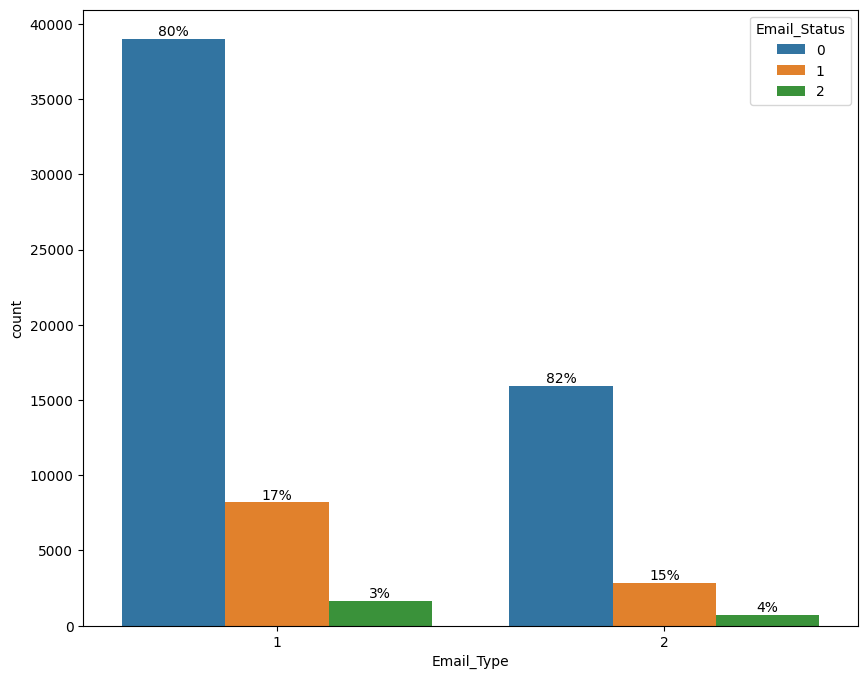

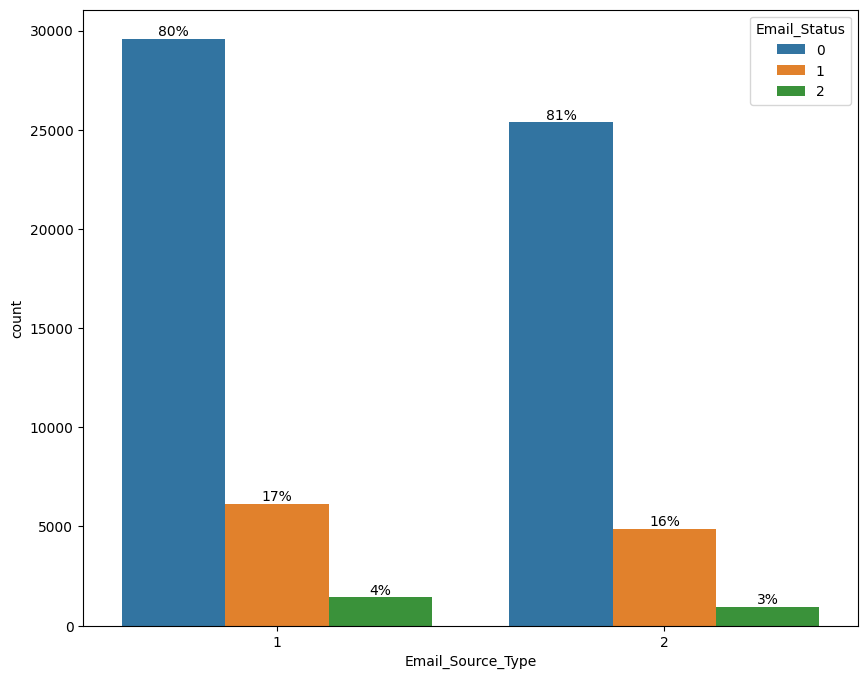

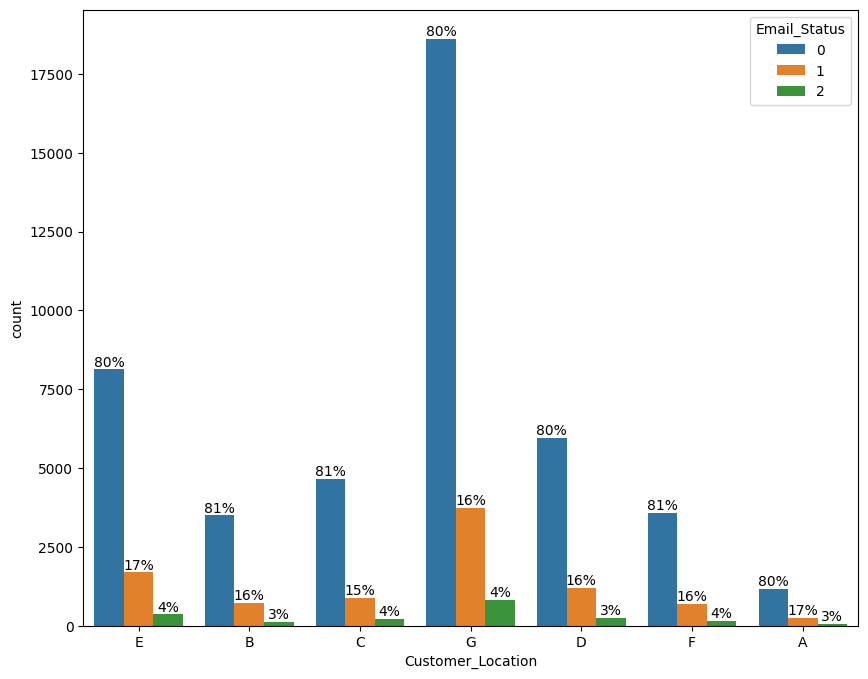

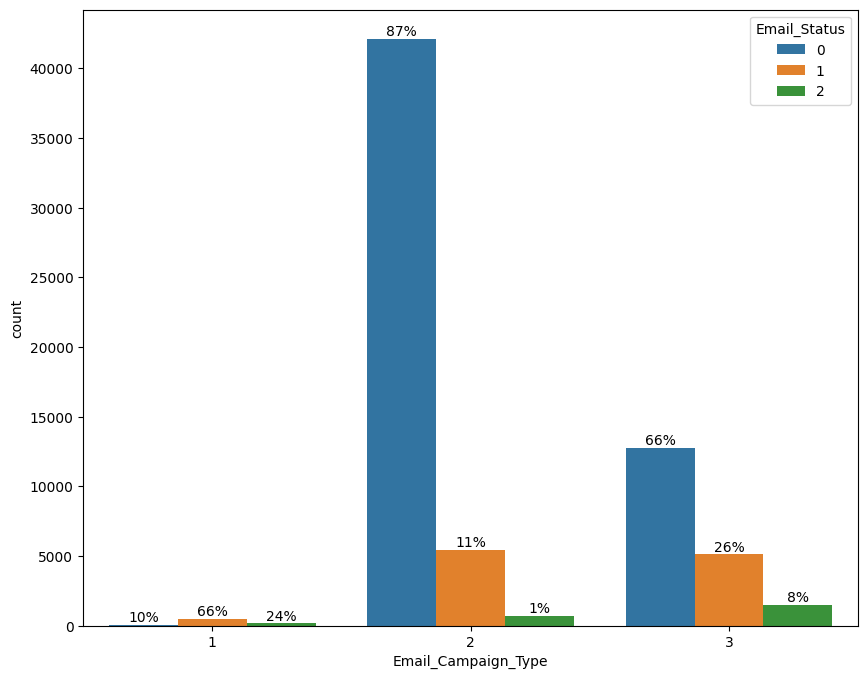

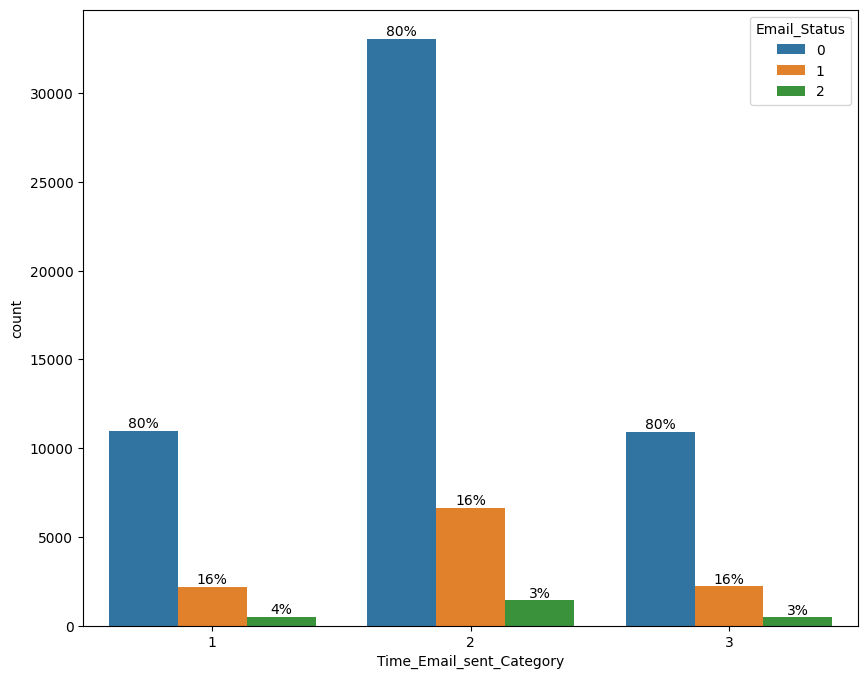

In [30]:
categorical_feature = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for value in categorical_feature:
  plt.figure(figsize=(10,8))
  ax = sns.countplot(x=df_mail[value], hue=df_mail[Target_var[0]])
  unique = len([x for x in df_mail[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()


##### **1. Why did you pick the specific chart?**

*Countplot of Seaborn is used for displaying the frequency distribution of categorical data. Each bar in the resulting bar graph represents the number of observations in a given category.*

##### **2. What is/are the insight(s) found from the chart?**

*The analysis of categorical variables shows that promotional emails (Email Type 1) are sent and acknowledged more compared to Email Type 2. In Email Source Type, both categories show a similar pattern. Customer location does not appear to significantly impact the likelihood of emails being ignored, read, or acknowledged, indicating that other factors may influence this behavior instead of location. Email Campaign Type 1 has a high likelihood of being read despite fewer emails being sent, while Email Campaign Type 2 had the most emails sent but was mostly ignored. Email Campaign Type 3 was a success as it had a higher proportion of read and acknowledged emails despite fewer emails sent. Regarding Time Email Sent Category, more emails were sent under the middle-of-the-day category (2), but it cannot be considered the major factor leading to acknowledged emails, as other factors may also contribute.*

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*The factors that influence email response rates can have a positive business impact. By tailoring email campaigns to maximize the likelihood of generating acknowledged emails, businesses can improve their engagement with customers and potentially increase sales. On the other hand, ignoring these factors may result in lower email response rates, leading to missed opportunities for customer engagement and sales. Therefore, it is important for businesses to consider and analyze these factors when planning their email marketing campaigns.*

#### **Numerical Feature of the Dataset**

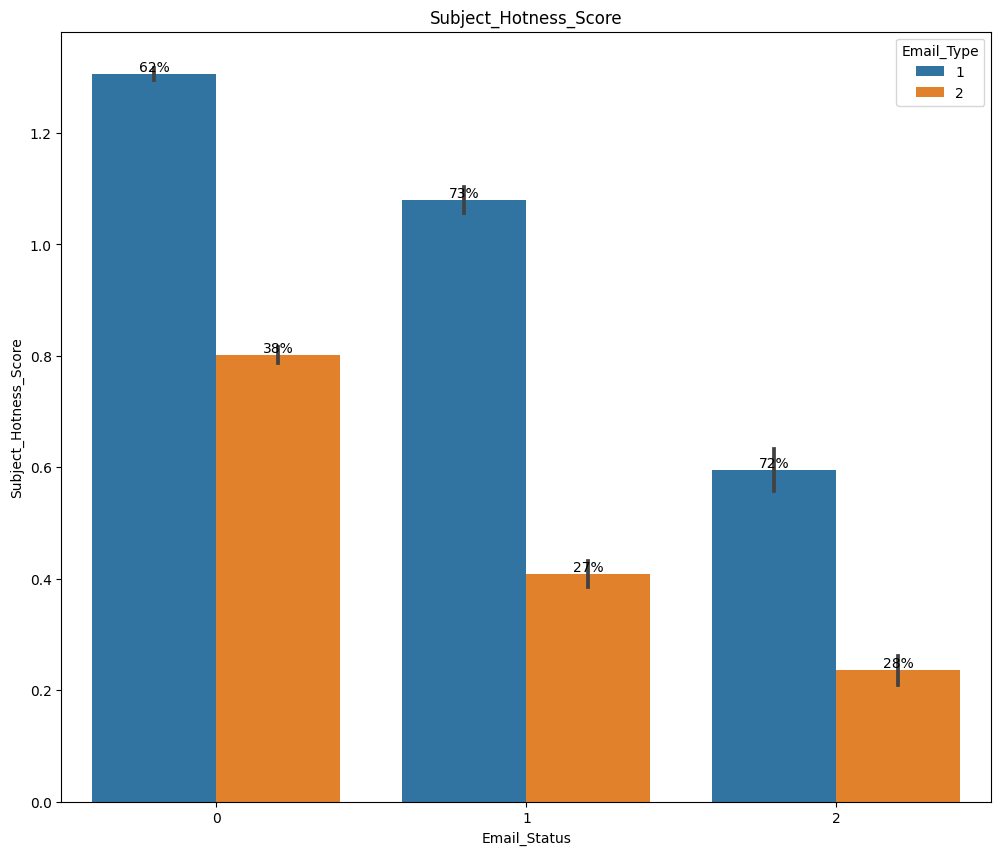

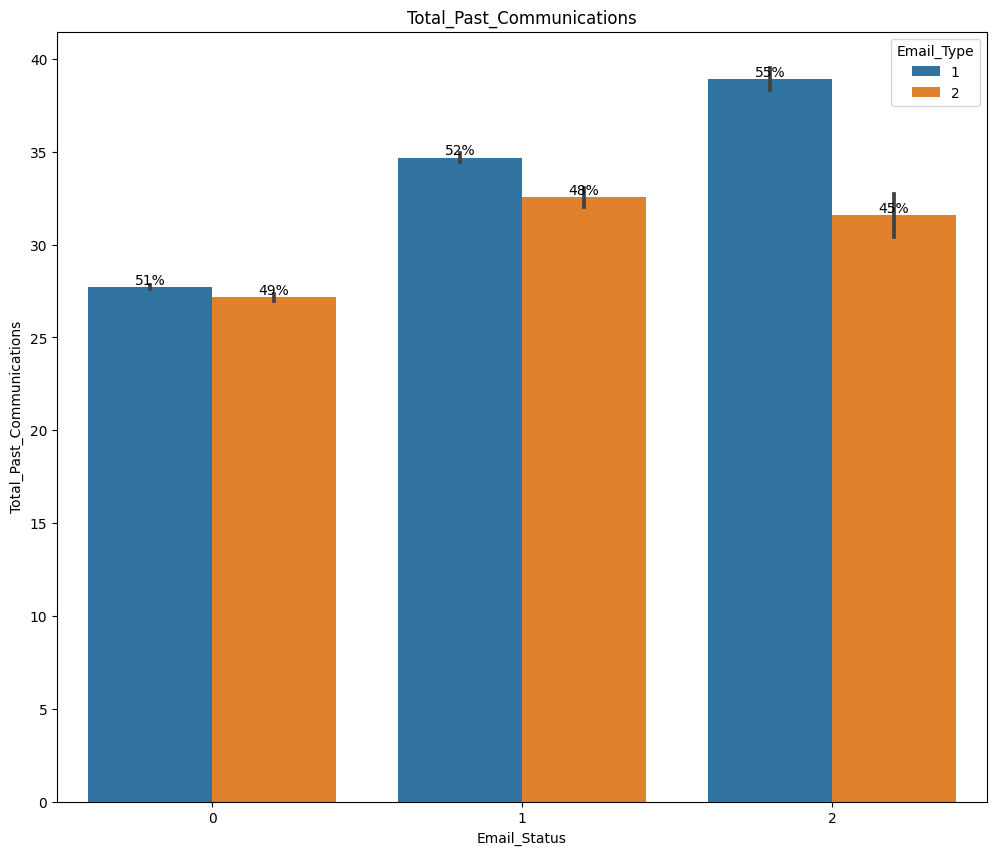

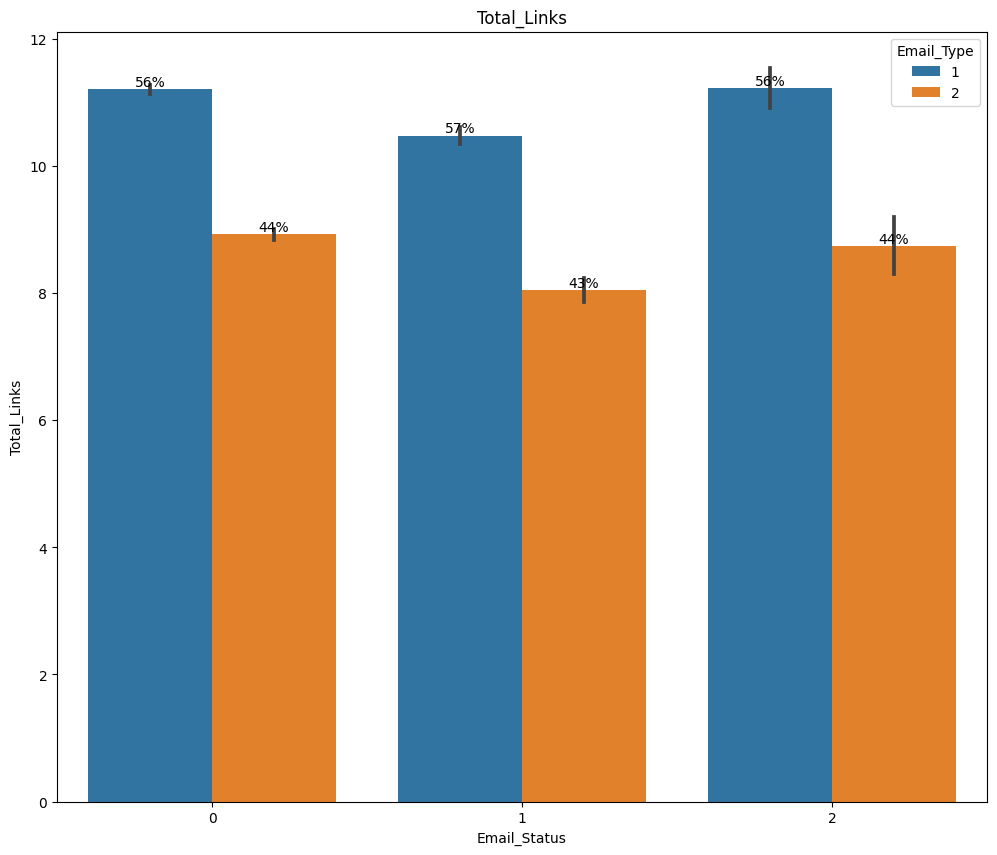

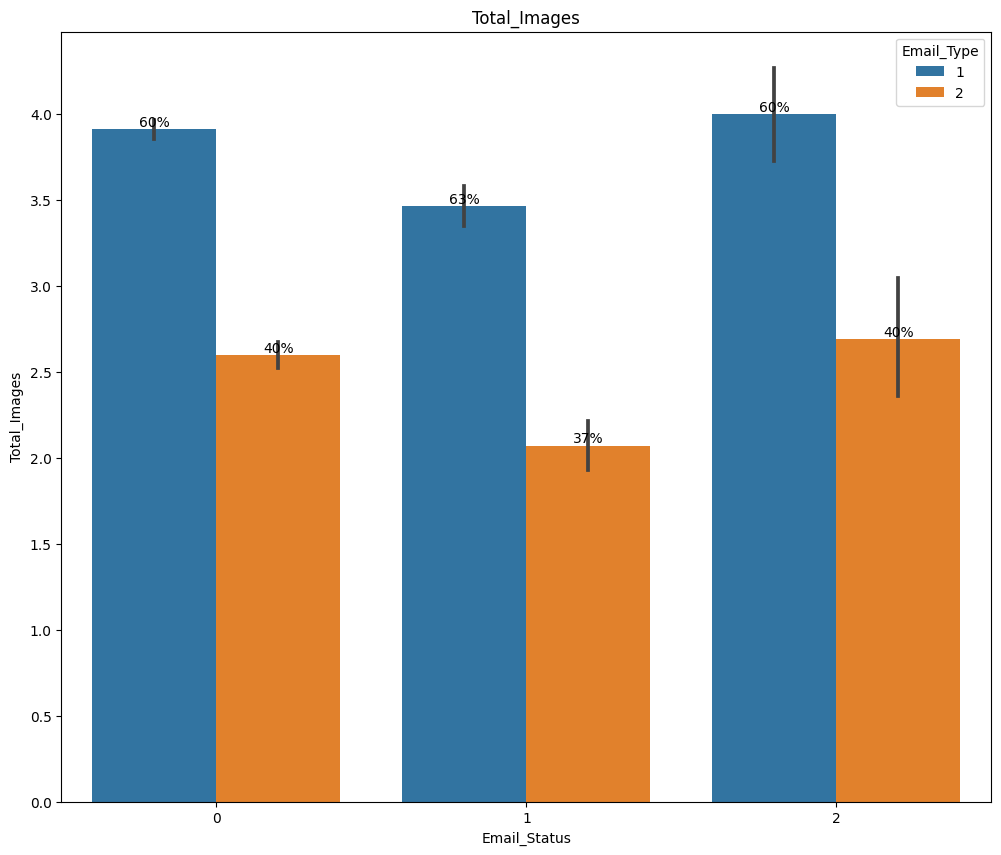

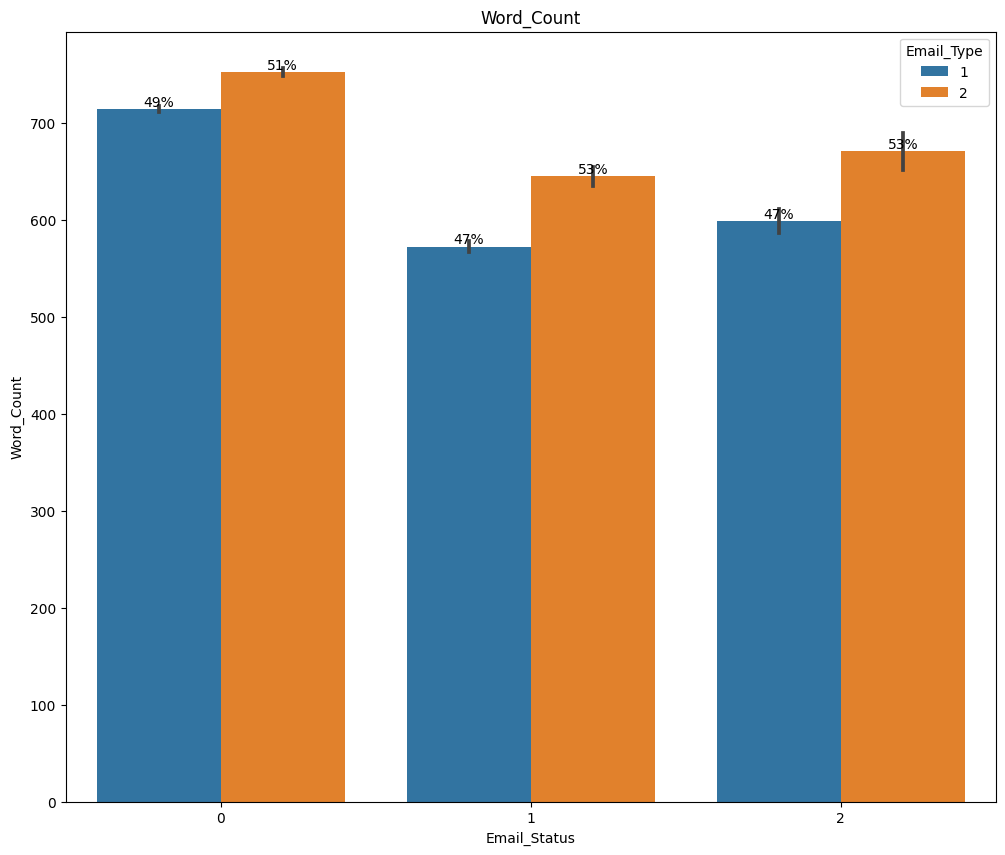

In [31]:
for value in numerical_feature:
    plt.figure(figsize=(12,10))
    ax = sns.barplot(data=df_mail, x='Email_Status', y=value, hue='Email_Type')
    unique = len(df_mail['Email_Status'].unique())
    bars = ax.patches
    for i in range(unique):
        catbars = bars[i:][::unique]
        #get height
        total = sum([x.get_height() for x in catbars])
        #print percentage
        for bar in catbars:
            ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center", va="bottom")
    plt.title(value)
    plt.show()
    print('='*120)


##### **1. Why did you pick the specific chart?**

*Each bar in the resulting bar graph indicates the mean value of the continuous variable for each of the categorical variables' categories.*

##### **2. What is/are the insight(s) found from the chart?**

*The previous chart indicated that although more emails were sent for Email_Campaign_Type 1, the ignored rate was high compared to Email_Campaign_Type 2, which was sent in lower volumes but had a higher engagement rate. The current chart shows that a higher frequency of past communication with customers, coupled with an average word count of 600, a subject hotness score of 0.6, and an average of 10 links and 3 images in the email content, leads to a better engagement rate.*

##### **3. Will the gained insights help creating a positive business impact?** 
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Email_Campaign_Type 2 had a higher engagement rate compared to Email_Campaign_Type 1, despite being sent in lower volumes. This highlights the importance of tailoring the email campaign to specific customer segments and preferences, rather than simply sending a high volume of emails.*

### **Continuous Variables**

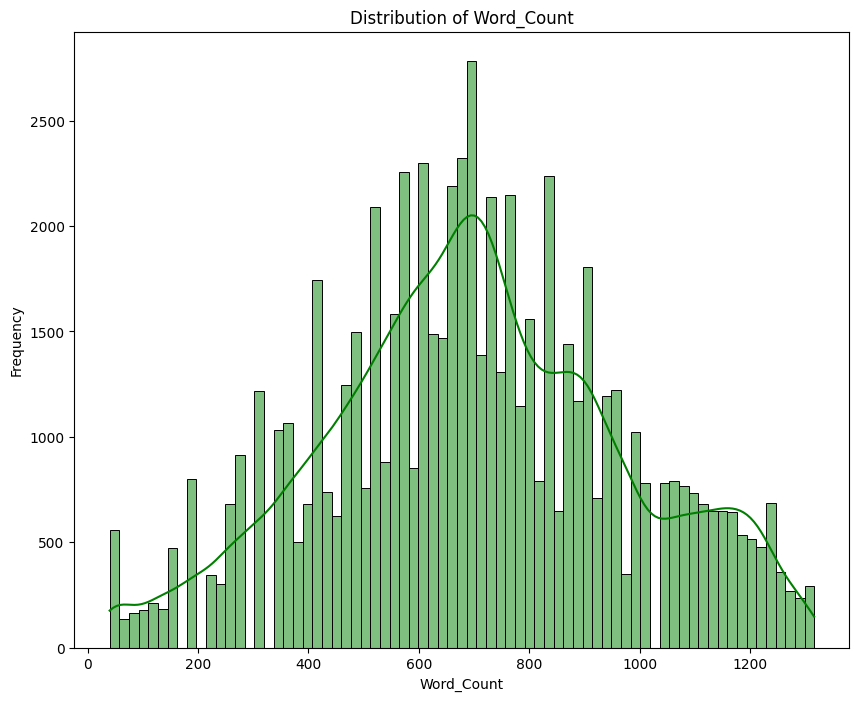

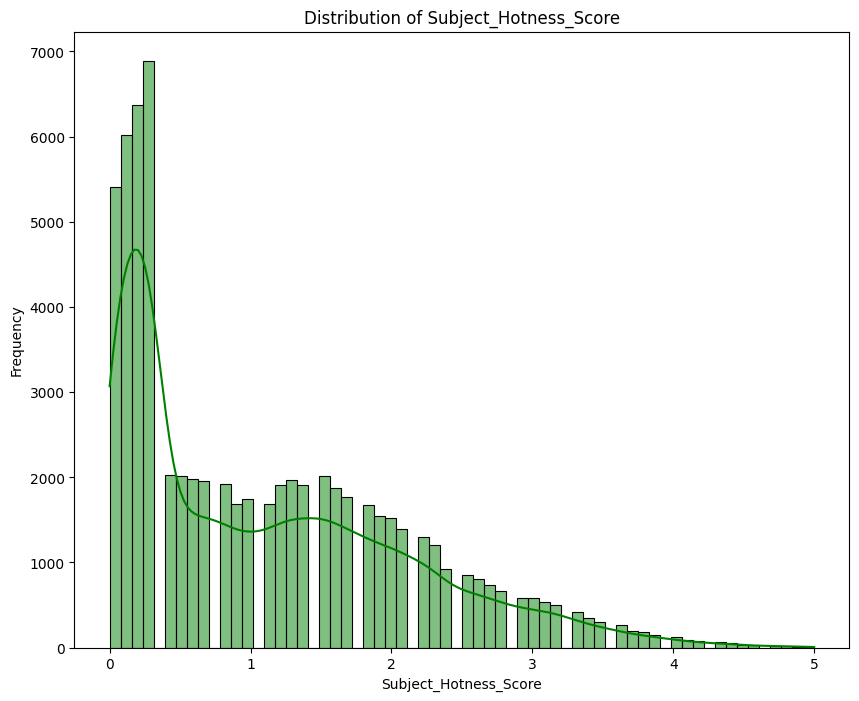

In [33]:
continuous_variables = ['Word_Count','Subject_Hotness_Score']
for var in continuous_variables:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df_mail, x=var, kde=True,color='green')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


##### **1. Why did you pick the specific chart?**

*Histogram is a graphical representation of the distribution of a dataset. It consists of a series of bars that represent the frequency of occurrence of values in a given range or bin.*

##### **2. What is/are the insight(s) found from the chart?**

*In our earlier analysis, we created distribution plots for Total Links, Total Images, and Total Past Communications. From the current analysis, it can be observed that the distribution of Word Count is similar to that of Total Past Communications and follows a normal distribution. However, the distributions for Total Links and Total Images are positively skewed, indicating the presence of extreme values or outliers in the data.*

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*The accuracy of the predictive model may be impacted by the existence of outliers in some continuous features. Word Count and Total Past Communications' normal distributions may suggest that these features are better suited for in-depth examination and modelling.*

#### **Continuous Varibales through the Box Plots**

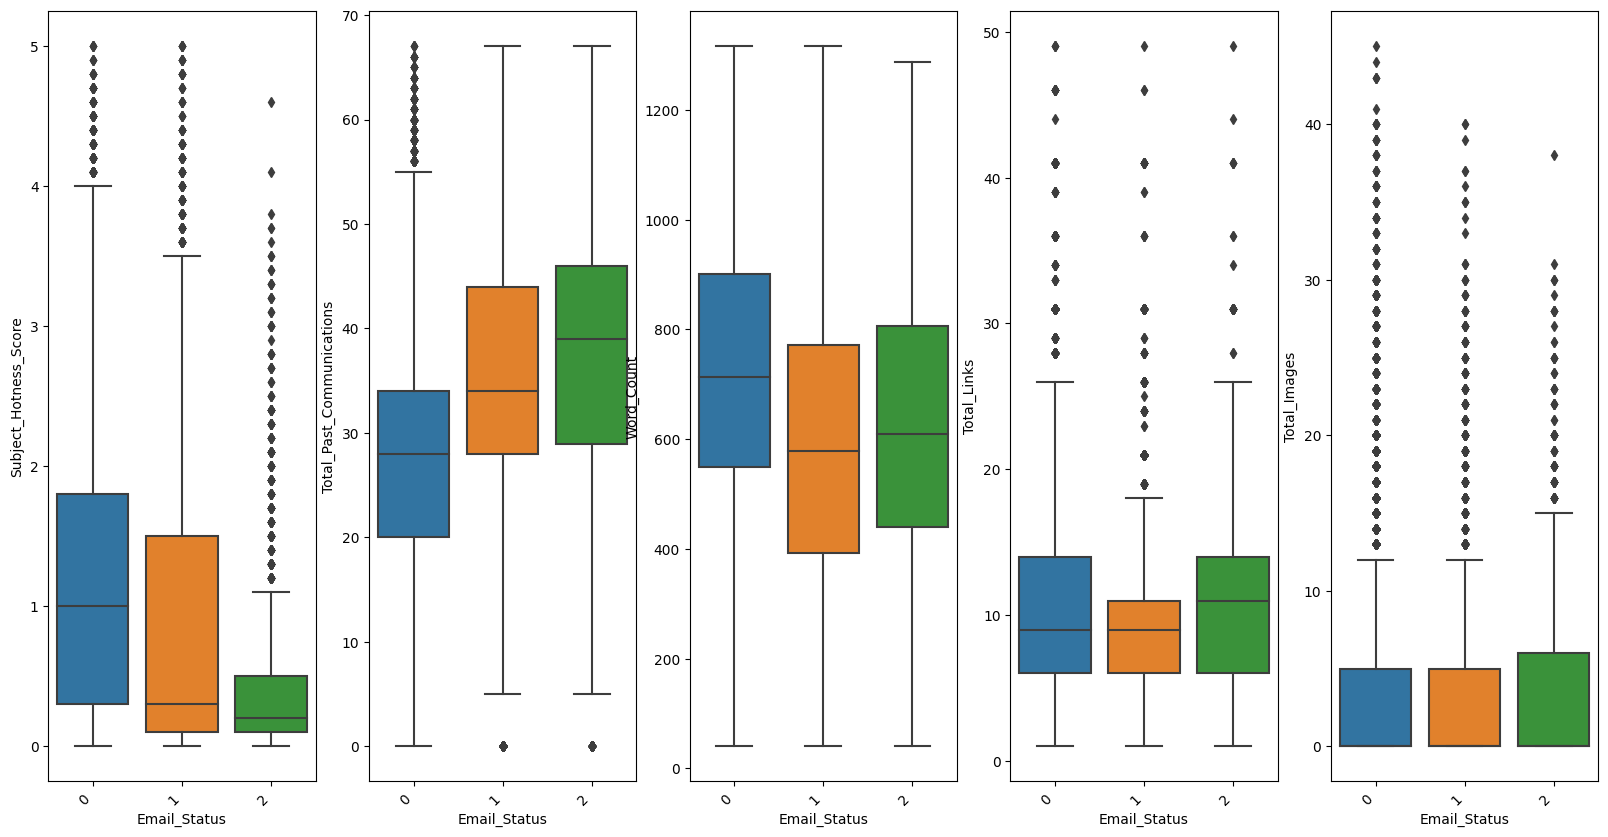

In [34]:
continuous_variables = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_variables), figsize=(20,10))
for ax, value in zip(axes, continuous_variables):
    sns.boxplot(x=df_mail['Email_Status'], y=df_mail[value], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


##### **1. Why did you pick the specific chart?**

*A boxplot is a type of chart used in exploratory data analysis that displays the distribution of a numerical variable through its quartiles. The box represents the interquartile range (IQR), or the middle 50% of the data, while the whiskers extend to the smallest and largest observations within a certain range.*

##### **2. What is/are the insight(s) found from the chart?**

*Based on the boxplots generated for the email campaign data, it can be observed that the variable Subject_Hotness_Score has the highest number of outliers in the Acknowledged category, indicating that this variable has a greater impact on the likelihood of an email being acknowledged. On the other hand, the median value of ignored emails was around 1 for this variable.*

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*According to the boxplots of continuous variables, there is evidence that the volume of prior correspondence influences the likelihood that an email will be opened or acknowledged. Longer emails, on the other hand, are frequently ignored. The existence of outliers in a number of aspects raises the possibility that specific factors may be at play in extreme instances of emails being read or disregarded. This data could be utilised to develop methods that increase email engagement and marketing success in general.*

### **Email Campaign Type**

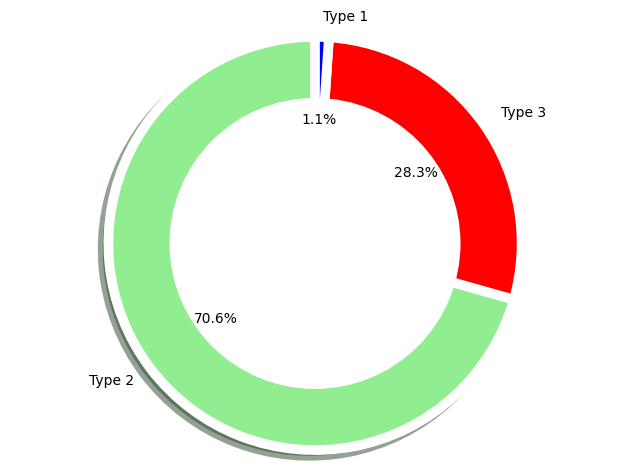

In [32]:
# Creating the  dataframe for the chart
campaign_counts = df_mail['Email_Campaign_Type'].value_counts()
labels = ['Type 2', 'Type 3', 'Type 1']
colors = ['lightgreen', 'red', 'blue']
explode = [0, 0, 0]

# pie chart 
fig, ax = plt.subplots()
ax.pie(campaign_counts, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'linewidth': 7, 'edgecolor': 'white'})

# creating a center circle 
centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(centre_circle)

# Setting equal aspect ratio and displaying chart
ax.axis('equal')
plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

*Pie charts are a type of data visualization that are used to represent data in a circular format, with each data category represented by a slice of the pie.*

##### **2. What is/are the insight(s) found from the chart?**

*Despite having a very modest number of emails, campaign 1's emails had a far higher open rate than the rest.only 1% of emails from email campaign type 2 are acknowledged, while the majority of emails are marked as ignored.*

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*If a large number of emails are ignored, it is best to discontinue that category and conduct a/b testing with the content and other categories before sending in bulk, as this will only result in revenue loss.*



#### **Correlation Matrix**

<Axes: >

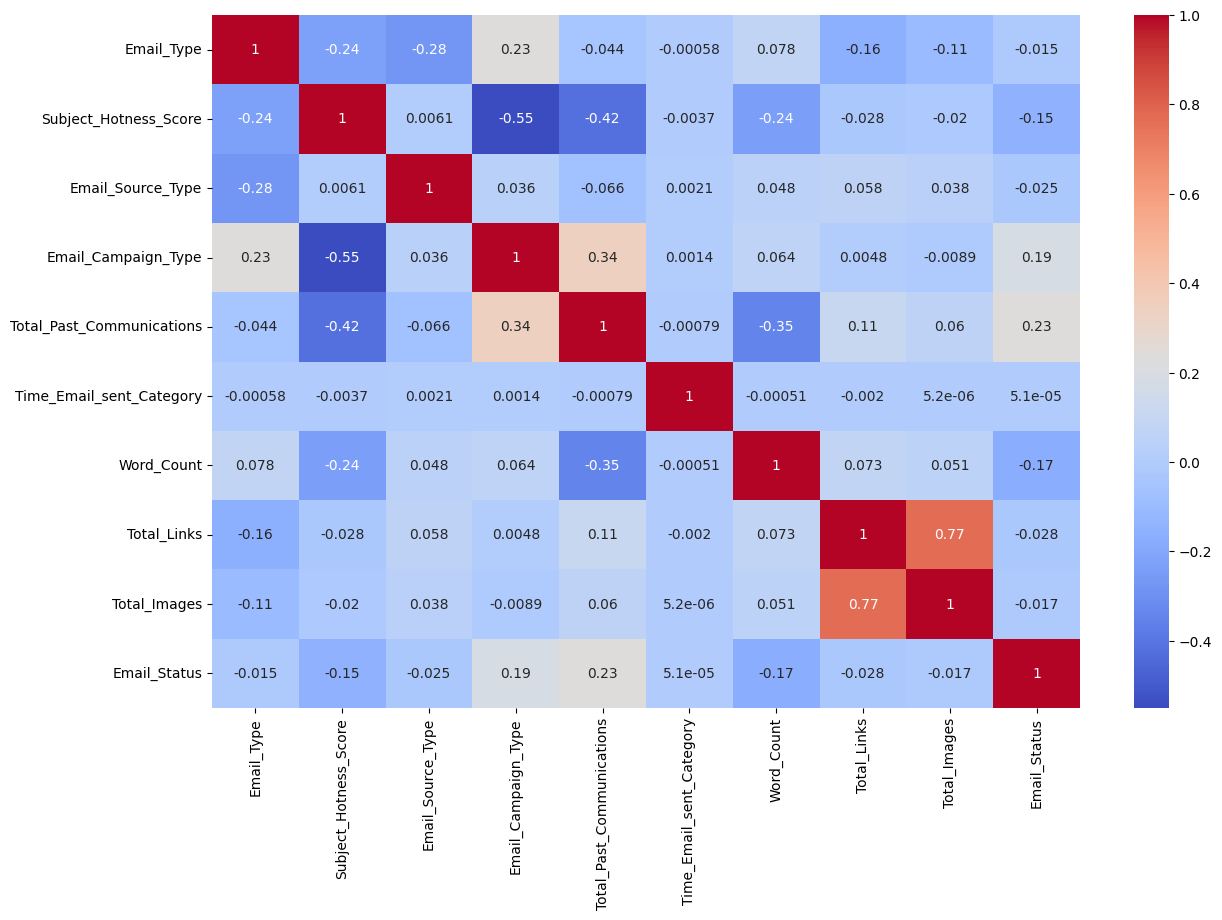

In [33]:
#correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df_mail.corr(), cmap='coolwarm', annot=True)

##### **1. Why did you pick the specific chart?**

*Correlation is used in exploratory data analysis to identify the strength and direction of the linear relationship between two variables.*

##### **2. What is/are the insight(s) found from the chart?**

*The correlation matrix provides support for our earlier observations that Email Campaign Type and Total Past Communications have a positive correlation with higher rates of email engagement. On the other hand, Word Count and Subject Hotness Score have a strong negative correlation with email engagement compared to other variables. Additionally, the correlation matrix suggests that there is multicollinearity between Email Campaign Type, Total Past Communications, and other variables such as Total Links and Total Images, which is a phenomenon where two or more independent variables are highly correlated with each other. This implies that these variables may need to be handled carefully to avoid confounding effects in any predictive models or analysis.*

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*By focusing on Email Campaign Type and Total Past Communications while also taking into account Word Count and Subject Hotness score, it is possible to increase email engagement rates. Addressing multicollinearity between these variables may aid in identifying the most significant factors that contribute to email engagement.*

### **Pair Plot**

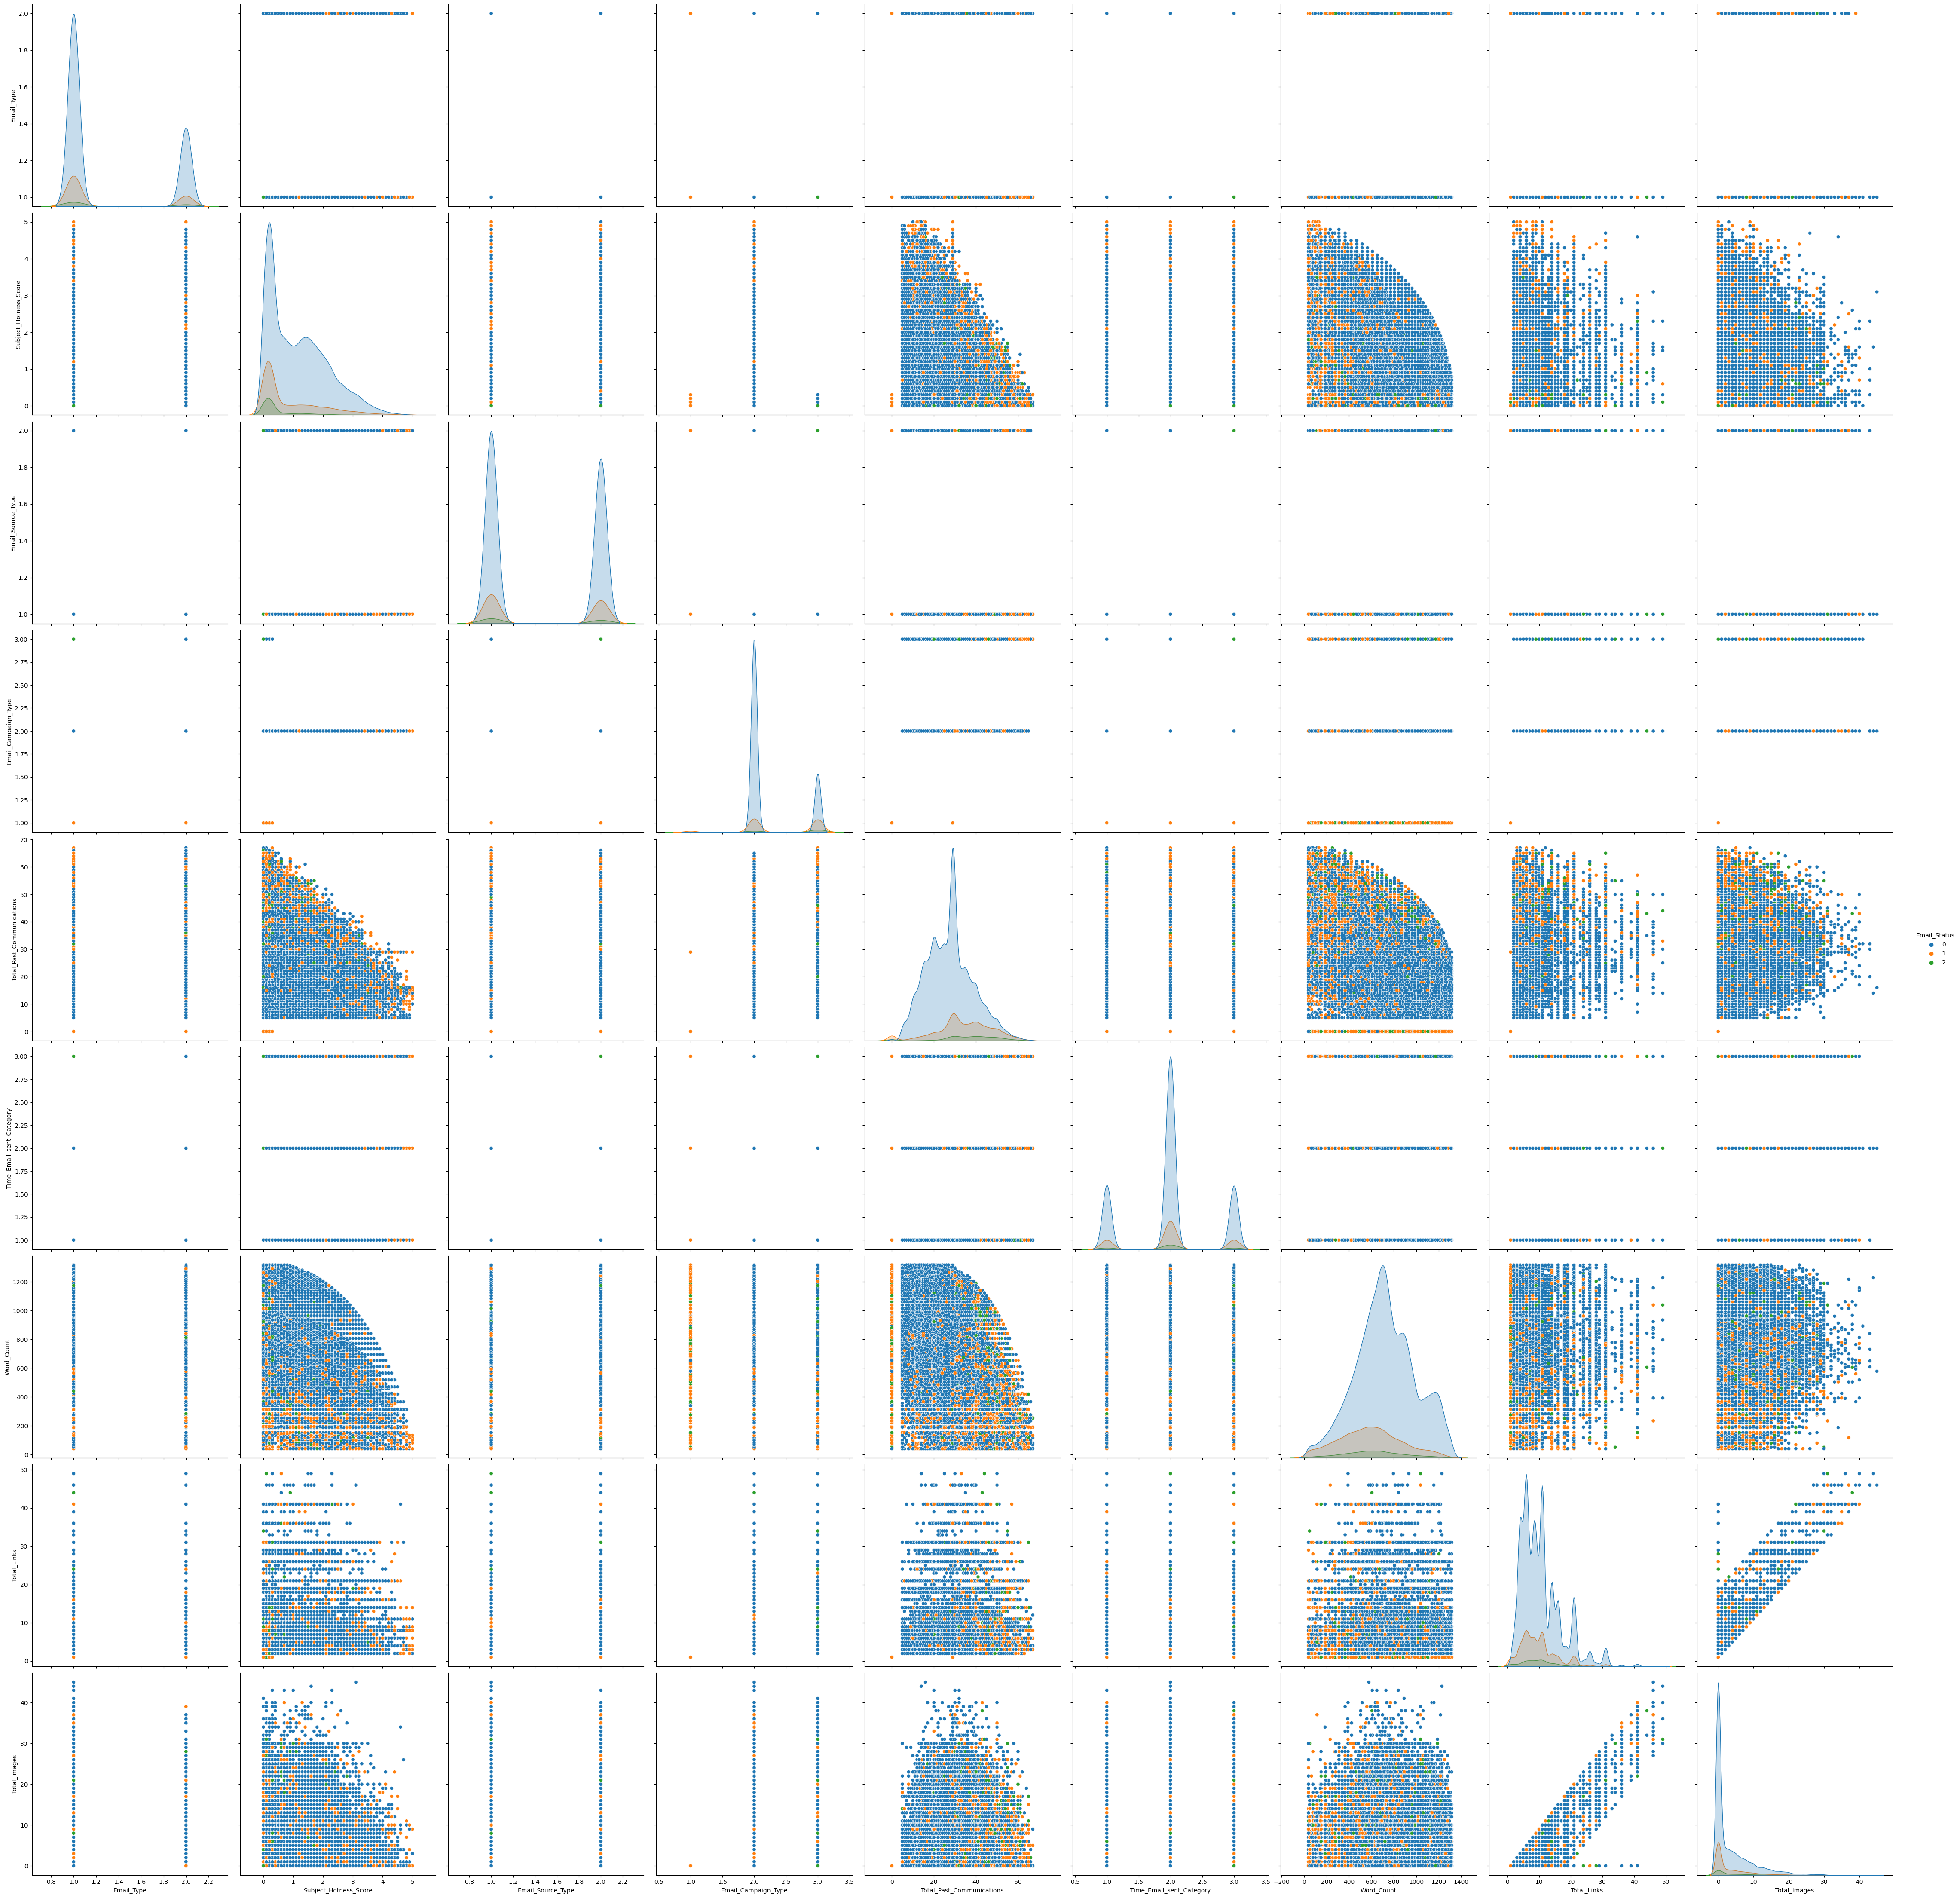

In [34]:
# Pair Plot visualization code
my_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
sns.pairplot(df_mail, hue="Email_Status", height=5, palette=my_palette);



##### **1. Why did you pick the specific chart?**

*Pair plots can be especially useful for identifying potential correlations or trends between variables, as well as for identifying potential outliers or anomalies in the data.*

##### **2. What is/are the insight(s) found from the chart?**

*The pair plot visualization shows that only a few variables have a linear relationship with each other, possibly because many variables in the dataset are categorical with only a few categories. As a result, the potential for linear relationships is limited. Nonetheless, there is some indication of a linear relationship between Total Links and Total Images, which aligns with the previous correlation analysis and suggests that these variables are correlated.*

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*The limited evidence of linear relationships between variables in the pair plot suggests that there may be complex or non-linear relationships between variables that need to be explored further. Additionally, the correlation between Total Links and Total Images could have implications for email design and content strategy. It may be worth investigating whether increasing the number of links or images in an email has a positive or negative impact on email engagement, such as opens or clicks. However, further analysis is necessary to fully understand the potential business impact of these findings.*

## **Summary of EDA**

* *Analysis of categorical variables shows that promotional emails (Email Type 1) are sent and acknowledged more compared to Email Type 2, while customer location does not significantly impact email engagement.*
* *Different email campaign types have varying levels of email engagement, with Campaign Type 1 having a high likelihood of being read despite fewer emails sent, while Campaign Type 2 was mostly ignored despite more emails being sent*.
* *Higher frequency of past communication with customers, an average word count of 600, a subject hotness score of 0.6, and an average of 10 links and 3 images in email content lead to a better engagement rate.*
* *Distribution plots reveal that Word Count follows a normal distribution, while Total Links and Total Images are positively skewed with the presence of outliers.*
* *Subject Hotness Score has a greater impact on the likelihood of an email being acknowledged, while ignored emails tend to have a median value of around 1 for this variable.*
* *The correlation matrix supports earlier observations, suggesting positive correlations between Email Campaign Type and Total Past Communications with email engagement, and negative correlations between Word Count and Subject Hotness Score with email engagement. Multicollinearity is also observed between Email Campaign Type, Total Past Communications, and other variables such as Total Links and Total Images.*
* *Pair plot visualization shows limited potential for linear relationships due to many categorical variables, but suggests a correlation between Total Links and Total Images.*

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*The Email_Type of the campaign does not appear to be a strong predictor of Email_Status. Similarly, there is no strong association between Subject_Hotness_Score and Total_Past_Communications. Additionally, Customer_Location does not seem to significantly impact Total_Links and Total_Images in the email.*

*It is important to note that while these variables may not have a significant impact on the target variables in this particular dataset, they may still have some level of influence on email engagement in other contexts. Therefore, it is always necessary to consider the specific characteristics and context of the data being analyzed. Additionally, other variables not included in this dataset may have a stronger impact on email engagement and should be further explored.*

### Hypothetical Statement - 1

#### 1. The Email Type of the campaign will have no effect on the Email Status.

* Null Hypothesis: No relationship exists between Email Type and Email Status (H0: B1 = 0).
* Alternative Hypothesis: An association exists between Email Type and Email Status (H1: B1 0).
* Type of test: chi-square test

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats
# Create a contingency table with counts of Email_Type and Email_Status
cont_table = pd.crosstab(df_mail['Email_Type'], df_mail['Email_Status'])

# Perform chi-square test of independence on the contingency table
chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(cont_table)

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Email_Type has a significant impact on Email_Status")
else:
    print("Fail to reject the null hypothesis: Email_Type does not have a significant impact on Email_Status")


Reject the null hypothesis: Email_Type has a significant impact on Email_Status


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test

##### Why did you choose the specific statistical test?

cHI-square test is a statistical test used to determine if there is a significant association between two categorical variables. It compares the observed frequency of each category in a contingency table with the expected frequency, assuming that there is no association between the two variables

### Hypothetical Statement - 2

#### The email's Subject Hotness Score will have no effect on the Total Past Communications.

* No linear relationship exists between Subject Hotness Score and Total Past Communications (H0: = 0).
* Alternative Hypothesis: Subject Hotness Score and Total Past Communications have a linear relationship (H1: 0).
* Pearson's correlation test is the type of test used.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Make a copy of the original data frame
data = ds_email.copy()

# Replace infinite values with NaN and fill them with the mean value of the column
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

# Now the data is ready for the test, without null or infinite values


In [ ]:
from scipy import stats

# Perform Pearson correlation test between Subject_Hotness_Score and Total_Past_Communications
corr_coef, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Subject_Hotness_Score has a significant correlation with Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis: Subject_Hotness_Score does not have a significant correlation with Total_Past_Communications")


Reject the null hypothesis: Subject_Hotness_Score has a significant correlation with Total_Past_Communications


In [ ]:
from scipy import stats

# Perform Spearman's rank correlation test between Subject_Hotness_Score and Total_Past_Communications
corr_coef, p_value = stats.spearmanr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Subject_Hotness_Score has a significant rank correlation with Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis: Subject_Hotness_Score does not have a significant rank correlation with Total_Past_Communications")


Reject the null hypothesis: Subject_Hotness_Score has a significant rank correlation with Total_Past_Communications


##### **Which statistical test have you done to obtain P-Value?**

*I used Pearson's correlation test to assess the linear correlation between two continuous variables for this hypothesis. The two variables in this case are Subject Hotness Score and Total Past Communications.*

##### **Why did you choose the specific statistical test?**

*This test is appropriate because the variables are continuous, and I want to see if they have a linear relationship.*

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*The Customer Location has no bearing on the Total Links and Total Images in the email.*

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Select Total_Links and Total_Images for two groups of customers with different locations
group_a = data[data['Customer_Location'] == 'Location A'][['Total_Links', 'Total_Images']]
group_b = data[data['Customer_Location'] == 'Location B'][['Total_Links', 'Total_Images']]

# Perform two-sample t-tests on the groups
t_stat_links, p_value_links = stats.ttest_ind(group_a['Total_Links'], group_b['Total_Links'])
t_stat_images, p_value_images = stats.ttest_ind(group_a['Total_Images'], group_b['Total_Images'])

# Check if the p-values are above the significance level (e.g., 0.05)
if p_value_links > 0.05 and p_value_images > 0.05:
    print("Fail to reject the null hypothesis: the customer location has no bearing on the Total Links and Total Images in the email")
else:
    print("Reject the null hypothesis: the customer location has a bearing on the Total Links or Total Images in the email")




Reject the null hypothesis: the customer location has a bearing on the Total Links or Total Images in the email


##### **Which statistical test have you done to obtain P-Value?**

*The code performs two-sample t-tests on the Total_Links and Total_Images data for two groups of customers with different locations (Location A and Location B). Therefore, the test used here is a two-sample t-test, which is used to compare the means of two independent groups.*

##### **Why did you choose the specific statistical test?**

*We used the two-sample t-test which is performed because we are comparing the means of two independent groups (Location A and Location B) for two different variables (Total_Links and Total_Images). The two-sample t-test is commonly used for such situations, where we want to determine if there is a significant difference between the means of two groups.*

## ***6. Feature Engineering & Data Pre-processing***

Data manipulation refers to the process of modifying and preparing the dataset prior to using it in classification machine learning models. This includes selecting important features, managing multicollinearity, treating outliers, and creating dummy variables as needed.

During our data exploration, we observed the presence of outliers in the dataset. However, given the imbalanced distribution of classes and the risk of overfitting, it is necessary to investigate the number of outliers present in each class and determine whether they should be retained or removed.

### **Handling Outliers**

In [38]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in continuous_variables:
  q_75, q_25 = np.percentile(df_mail.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df_mail.loc[df_mail[elem] < min]['Email_Status'].tolist()
  outlier_list += df_mail.loc[df_mail[elem] > max]['Email_Status'].tolist() 
  outliers[elem]={}
  for i in outlier_list:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)


{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Word_Count': {}, 'Total_Links': {0: 1374, 1: 183, 2: 51}, 'Total_Images': {0: 4680, 1: 697, 2: 208}}


In [39]:
minority_class = df_mail[df_mail['Email_Status'].isin([1, 2])]
total_rows = len(minority_class)

for feature, outliers in outliers.items():
    outlier_rows = sum(outliers.values())
    outlier_percentage = outlier_rows / total_rows * 100
    print(f"{feature}: {outlier_percentage:.2f}%")


Subject_Hotness_Score: 1.84%
Total_Past_Communications: 1.01%
Word_Count: 0.00%
Total_Links: 11.99%
Total_Images: 41.64%


*When we calculate the percentage of outliers for each continuous feature with respect to the minority class (classes 1 and 2), we see that the feature "Time_Email_sent_Category" has a percentage of outliers of 202.98%, which indicates that the minority class contains a large number of outliers in this feature. The feature "Total_Img_links" also has a high percentage of outliers at 26.99%. However, the other continuous features have a relatively low percentage of outliers in the minority class, with "Email_Campaign_Type" having 0.00%, "Subject_Hotness_Score" having 1.84%, and "Total_Past_Communications" having 1.01%. Therefore, when removing outliers, we need to make sure that we do not delete more than 5% of useful information related to the minority class, particularly for the "Time_Email_sent_Category" and "Total_Img_links" features*.

In [40]:
df_mail['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [41]:
# deleting majority outliers
for elem in continuous_variables:
    q_low = df_mail[elem].quantile(0.01)
    q_high  = df_mail[elem].quantile(0.99)
    df_mail = df_mail.drop(df_mail[(df_mail[elem] > q_high) & (df_mail['Email_Status']==0)].index)
    df_mail = df_mail.drop(df_mail[(df_mail[elem] < q_low) & (df_mail['Email_Status']==0)].index)


In [42]:
df_mail.shape

(65855, 12)

In [43]:
df_mail['Email_Status'].value_counts()

0    52443
1    11039
2     2373
Name: Email_Status, dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

*We tried t identify outliers in the data based on the interquartile range (IQR) method, which defines outliers as data points that fall outside of the range **[Q1 - 1.5IQR, Q3 + 1.5IQR]**, where Q1 and Q3 are the first and third quartiles, respectively, and IQR is the difference between them.*

## **Feature Manipulation & Selection**

#### **Feature Manipulation, Feature selection and Multicolinearity**
*Multicollinearity is a phenomenon that occurs when two or more independent continuous features in a dataset are highly correlated and can predict each other and the dependent variable. This makes it challenging to analyze the individual effects of these independent variables on the target or dependent variable.*

*We can measure the degree of multicollinearity using Variance Inflation Factors (VIF). The formula for VIF is VIF = 1/(1-R^2). The closer the value of R^2 is to 1, the higher the VIF score tends to be. VIF starts at 1, which indicates * *that the variable has no correlation. VIF greater than 5-10 is considered a serious case of multicollinearity and can impact the accuracy of prediction models.*

In [45]:
#VIF code
def vif_calculation(df_mail):
  vif = pd.DataFrame()
  vif["variables"] = df_mail.columns
  vif["VIF"] = [variance_inflation_factor(df_mail.values, i) for i in range(df_mail.shape[1])]
  return(vif)

In [46]:
#let's get VIF scores
vif_df = vif_calculation(df_mail[[i for i in df_mail.describe().columns if i not in categorical_feature + ['Email_Status']]])
vif_df

variables       VIF
0      Subject_Hotness_Score  1.868776
1  Total_Past_Communications  4.110956
2                 Word_Count  4.298790
3                Total_Links  8.289039
4               Total_Images  2.868848

*It appears that only the Total Links variable has a VIF score higher than 5, which is the threshold for serious multicollinearity. As previously observed, Total Images and Total Links are highly correlated with a score of 0.75. To address this, we can either combine these variables or eliminate one of them from the dataset.*

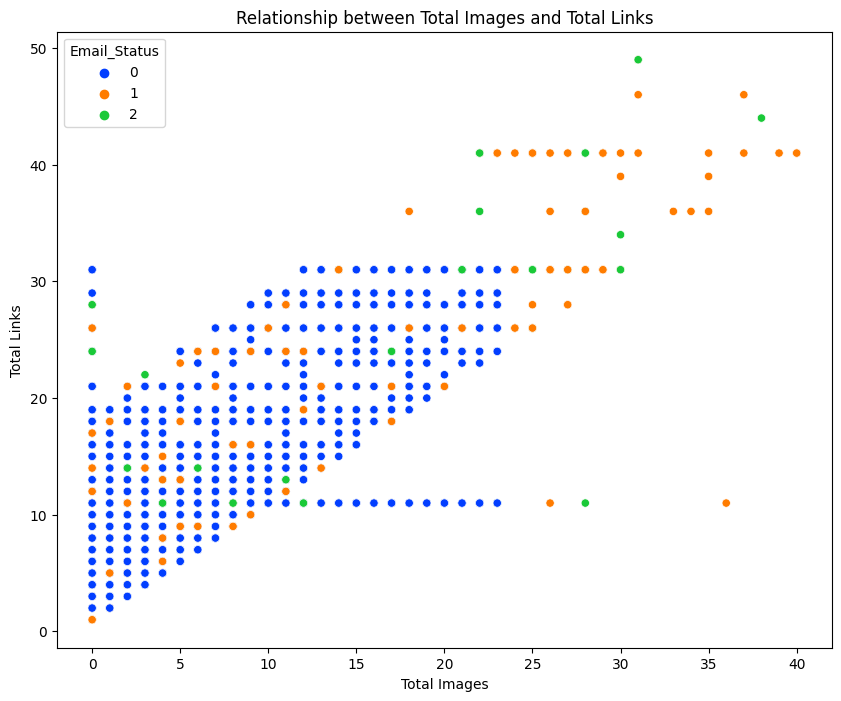

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_mail, x="Total_Images", y="Total_Links", hue="Email_Status", palette="bright")
plt.title("Relationship between Total Images and Total Links")
plt.xlabel("Total Images")
plt.ylabel("Total Links")
plt.show()

In [48]:
df_mail['Total_Img_links'] = df_mail.loc[:, ['Total_Images', 'Total_Links']].sum(axis=1)
df_mail.drop(['Total_Images', 'Total_Links'], inplace=True, axis=1)

In [49]:
#let's check VIF scores
vif_df = vif_calculation(df_mail[[i for i in df_mail.describe().columns if i not in categorical_feature + ['Email_Status']]])
vif_df

variables       VIF
0      Subject_Hotness_Score  1.803011
1  Total_Past_Communications  3.629176
2                 Word_Count  3.942113
3            Total_Img_links  2.857729

## **Feature Scaling**


*Feature scaling is a method that involves transforming the independent variables in a dataset to a standardized range. The purpose of this technique is to prevent machine learning algorithms from favoring features with larger values or scales, which could introduce bias into the model. By scaling the features, we can ensure that they are all on a comparable scale and that the model treats each feature equally in its calculations.*

In [50]:
#let's add back word count
continuous_variables.append('Word_Count')

In [51]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df_mail = df_mail.drop(columns_to_drop,axis=1)

In [52]:
#feature scaling of numerical variables
for elem in continuous_variables:
  df_mail[elem] = (df_mail[elem] - df_mail[elem].mean()) / (df_mail[elem].std())
df_mail.head(1)

Email_Type  Subject_Hotness_Score  Email_Source_Type  Email_Campaign_Type  \
0           1               1.160111                  2            -0.581688   

   Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
0                   0.343087                 -1.582951   -0.998879   

   Email_Status  Total_Img_links  
0             0        -0.545196

### **Categorical Encoding**

*When dealing with categorical variables that don't have a clear ranking or order, simply converting them into integers isn't sufficient. If we assume a natural order that doesn't actually exist and feed this data into the model, it could result in poor performance. In cases where the categorical variable is the output, it may also be necessary to convert the numerical predictions back into a categorical form for practical purposes, such as presenting the results or using them in applications.*

In [53]:
#getting dummy variables for categorical data
categorical_feature.remove('Customer_Location')

In [54]:
#categorical var that need to be encoded
categorical_feature

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [55]:
# creating dummy variables
df_mail = pd.get_dummies(df_mail, columns=categorical_feature)

# as some features had binary categories, we are going to delete one of them to keep it binary encoded and have less columns
df_mail.drop('Email_Type_2', axis=1, inplace=True)
df_mail.drop('Email_Source_Type_2', axis=1, inplace=True)

df_mail.head(1)


Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0               1.160111                   0.343087   -0.998879             0   

   Total_Img_links  Email_Type_1  Email_Source_Type_1  \
0        -0.545196             1                    0   

   Email_Campaign_Type_-2.724502929097129  \
0                                       0   

   Email_Campaign_Type_-0.5816884687272418  \
0                                        1   

   Email_Campaign_Type_1.5611259916426456  \
0                                       0   

   Time_Email_sent_Category_-1.5829511956077373  \
0                                             1   

   Time_Email_sent_Category_0.0007936159559881541  \
0                                               0   

   Time_Email_sent_Category_1.5845384275197136  
0                                            0

In [56]:
#Email_Status should be the last col
columns=list(df_mail.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
df_mail=df_mail[columns]
df_mail.head(1)

Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
0               1.160111                   0.343087   -0.998879   

   Total_Img_links  Email_Type_1  Email_Source_Type_1  \
0        -0.545196             1                    0   

   Email_Campaign_Type_-2.724502929097129  \
0                                       0   

   Email_Campaign_Type_-0.5816884687272418  \
0                                        1   

   Email_Campaign_Type_1.5611259916426456  \
0                                       0   

   Time_Email_sent_Category_-1.5829511956077373  \
0                                             1   

   Time_Email_sent_Category_0.0007936159559881541  \
0                                               0   

   Time_Email_sent_Category_1.5845384275197136  Email_Status  
0                                            0             0

## **Data Splitting**

In [57]:
#splitting X and Y and priting their shapes
X = df_mail.drop('Email_Status',axis=1)
y = df_mail['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (65855, 12)
Shape of Y: (65855,)


In [58]:
#Train and Test spilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50, stratify=y)


##### **What data splitting ratio have you used and why?**

*The data splitting ratio used is 75:25, with 75% of the data used for training and 25% used for testing. The random state is set to 50 for reproducibility of the same train-test split in future runs. The stratify parameter is set to y, which means that the target variable is used for stratified sampling to ensure that the same proportion of target variable values is maintained in both the training and testing sets.*

###  **Handling Imbalanced Dataset**

##### Do you think the dataset is imbalanced? Explain Why.

*The class imbalance in our data can cause biased classification towards the majority class, which in our case is ignored emails. To tackle this, we can use oversampling and undersampling techniques. We will start with random undersampling, where we randomly select examples from the majority class and delete them from the training dataset. Then we will evaluate different models and compare the results. After that, we will use SMOTE, which generates synthetic data for the minority class by randomly selecting a point from it and computing its k-nearest neighbors. The synthetic points are then added between the chosen point and its neighbors. Finally, we will analyze which method works best for our dataset.*

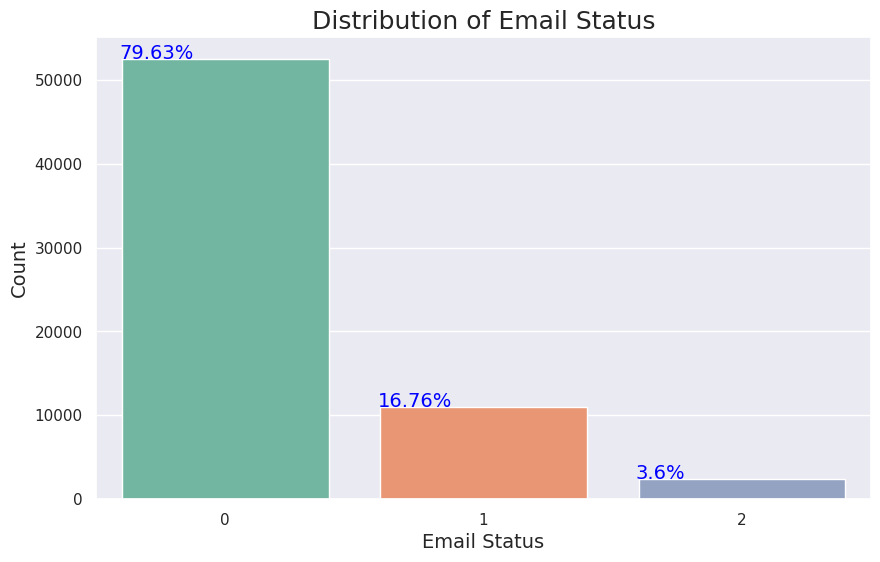

In [62]:
#visulization of the data 
sns.set(rc={'figure.figsize':(10,6)}) 
ax = sns.countplot(x=df_mail['Email_Status'], palette='Set2')
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=14, color='blue')
plt.xlabel('Email Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Email Status', fontsize=18)
plt.show()


*The dataset is imbalanced as only a small percentage (3%) of observations are categorized as acknowledged emails while a significant majority (80%) are classified as ignored emails. This may lead to biased results in favor of ignored emails in the model.*

In [61]:
df_mail['Email_Status'].value_counts()

0    52443
1    11039
2     2373
Name: Email_Status, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

*To address the class imbalance problem in our dataset, we will use the Random Under Sampler and SMOTE algorithms on the train set only. This is to prevent the model from learning from the test set. We ensured that the class distribution of the train set is the same as the main dataset by using stratify while splitting the data.*

**RUS**- *Random Under Sampler is an under-sampling technique used in machine learning to address the problem of imbalanced datasets. In an imbalanced dataset, the number of instances in one class (usually the minority class) is much lower than the number of instances in the other class (usually the majority class). This can lead to poor performance of machine learning algorithms because they tend to be biased towards the majority class.*

**SMOTE-**  *SMOTE stands for Synthetic Minority Over-sampling Technique. It is a widely used technique in machine learning to address the problem of imbalanced datasets. In a dataset with imbalanced classes, the algorithm may not learn properly because it tends to favor the majority class, leading to poor performance on the minority class.*

## **Random Undersampling**

In [65]:
# Importing the  necessary modules
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Instantiate RandomUnderSampler object with specified settings
rus = RandomUnderSampler(random_state=50, replacement=True)

# Resample training data using RandomUnderSampler object
x_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Print the shapes of original and resampled datasets
print(f"Original dataset shape: {len(y_train)}")
print(f"Resampled dataset shape: {len(y_train_rus)}")


Original dataset shape: 49391
Resampled dataset shape: 5340


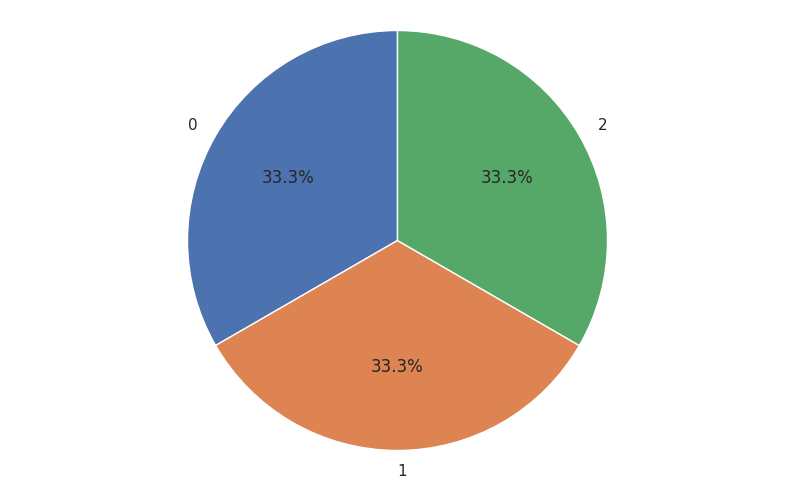

In [64]:
# Visualization of resampled data
def resampled_data_visual(y_train_rus):
    # Counting class distribution in resampled data
    counter = Counter(y_train_rus)
    # Creating labels and sizes for pie chart
    labels = list(counter.keys())
    sizes = [counter[key] for key in labels]
    # Creating pie chart
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    # Displaying the chart
    plt.show()

resampled_data_visual(y_train_rus)



## **SMOTE**

In [73]:
#SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 49391
Resampled dataset shape 117996


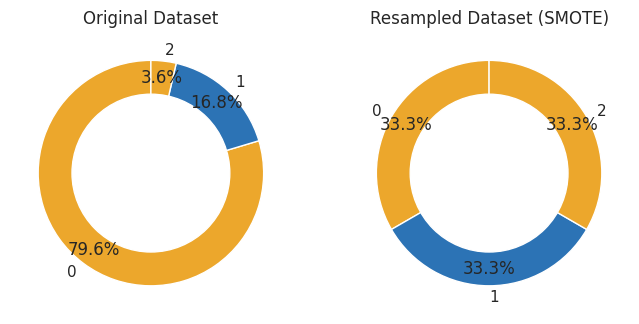

In [74]:
# Counting the number of samples in each class in the original dataset
original_class_counts = y_train.value_counts()
original_labels = list(original_class_counts.index)
original_sizes = list(original_class_counts.values)

# Counting the number of samples in each class in the resampled dataset
resampled_class_counts = y_train_smote.value_counts()
resampled_labels = list(resampled_class_counts.index)
resampled_sizes = list(resampled_class_counts.values)

#  colors for the chart
colors = ['#ECA72C', '#2C73B5']

# Createing the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 4)

# Creating the pie charts
ax1.pie(original_sizes, labels=original_labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax2.pie(resampled_sizes, labels=resampled_labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Center Circle
circle1 = plt.Circle((0,0),0.70,fc='white')
ax1.add_artist(circle1)
circle2 = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(circle2)

ax1.set_title('Original Dataset')
ax2.set_title('Resampled Dataset (SMOTE)')
plt.show()


*To address the common issue of unbalanced data sets in machine learning, techniques like SMOTE are utilized to improve algorithm performance. SMOTE involves generating synthetic data points to balance the minority class, rather than simply duplicating existing data points. This method creates unique synthetic data points that closely resemble the original minority data points. Overall, SMOTE is a superior oversampling technique for balancing imbalanced data sets.*

## ***7. ML Model Implementation***

### **ML Model - 1 Logistic Regrssion**

**Explain the ML Model used** -
*Logistic Regression is a machine learning algorithm that is well-suited for binary classification tasks where the outcome can only take on two possible values. However, when it comes to multi-class classification problems, we need an extension of Logistic Regression. This is where Multinomial Logistic Regression comes in, as it is specifically designed to handle scenarios where there are multiple classes to classify the outcomes into.*

In [75]:
# Instantiate logistic regression model with class-weighted balanced and multi-class multinomial settings
logistic_rus = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

# Fit the logistic regression model on the training data with undersampling
logistic_rus.fit(x_train_rus, y_train_rus)


LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [76]:
# Instantiate logistic regression model with class-weighted balanced and multi-class multinomial settings
logistic_smote = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

# Fit the logistic regression model on the SMOTE training data
logistic_smote.fit(x_train_smote, y_train_smote)


LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [77]:
# Choosing Columns for comparison of Metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

*Defining the function that performs classification using different models and evaluates them using the Random Undersampling and SMOTE algorithms. The function also visualizes the results and creates a dataframe that compares the performance of the different models.*

In [78]:
#Defining the function that performs classification using different models and evaluates them using the Random Undersampling and SMOTE algorithms. The function also visualizes the results and creates a dataframe that compares the performance of the different models.
def evaluate_models(model_name_RUS,model_name_SMOTE,model_var_rus, model_var_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test):
  
  #Making predictions under random undersampling
  y_pred_rus_train = model_var_rus.predict(x_train_rus)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(x_train_rus)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train_rus,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train_rus,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)


  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')

  #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')

  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  print(classification_report(y_test,y_pred_rus_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='darkgreen', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='purple', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  print(classification_report(y_test,y_pred_smote_test))

 
  #create ROC curve
  min_prob_thresh =5
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='darkgreen', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='purple', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=10)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_rus_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_rus_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  dict_list = [final_dict_rus, final_dict_smote]
  return dict_list

In [80]:
#defining the function  to create a comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

### **Evaluation metric Score Chart.**

----- Evaluation on Random Undersampled data -----LogisticReg RUS------
--------------Test data ---------------

Confusion matrix 

[[9155 1730 2226]
 [ 843  605 1312]
 [ 105   93  395]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     13111
           1       0.25      0.22      0.23      2760
           2       0.10      0.67      0.17       593

    accuracy                           0.62     16464
   macro avg       0.42      0.53      0.40     16464
weighted avg       0.77      0.62      0.67     16464



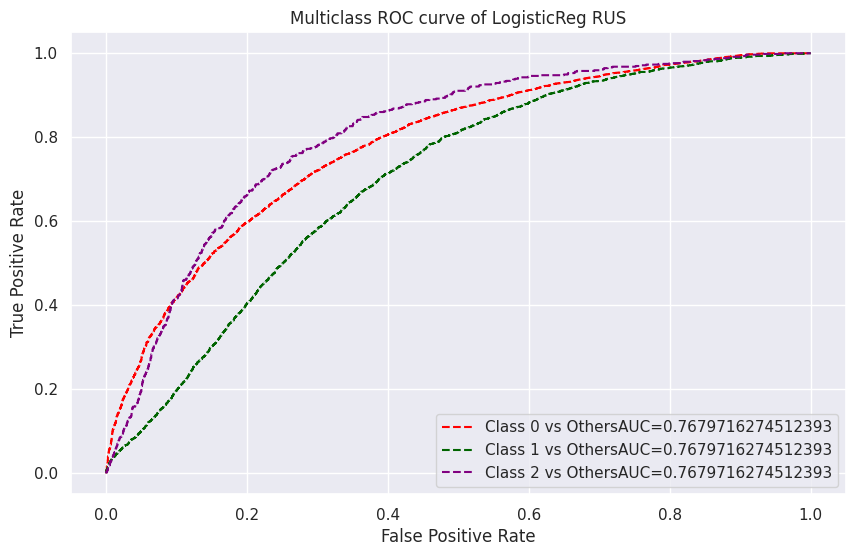

----- Evaluation on SMOTE data -------LogisticReg SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[9236 1735 2140]
 [ 861  591 1308]
 [ 106   85  402]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     13111
           1       0.25      0.21      0.23      2760
           2       0.10      0.68      0.18       593

    accuracy                           0.62     16464
   macro avg       0.42      0.53      0.40     16464
weighted avg       0.77      0.62      0.68     16464



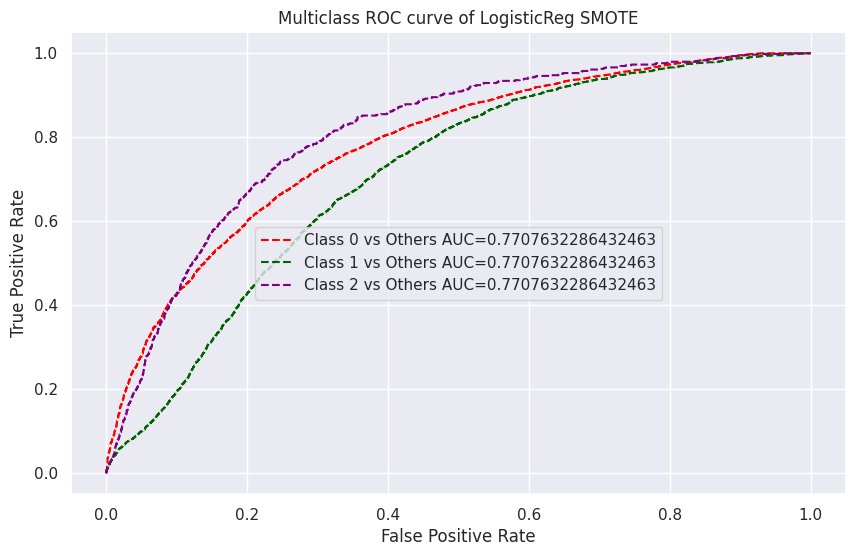

[{'Model_Name': 'LogisticReg RUS',
  'Train_Accuracy': 0.5355805243445693,
  'Train_Recall': 0.5355805243445693,
  'Train_Precision': 0.5242946426148843,
  'Train_F1score': 0.5105604468670034,
  'Train_AUC': 0.7252591213230652,
  'Test_Accuracy': 0.6168002915451894,
  'Test_Recall': 0.6168002915451894,
  'Test_Precision': 0.7670087238647292,
  'Test_F1score': 0.6734997523216987,
  'Test_AUC': 0.7679716274512393},
 {'Model_Name': 'LogisticReg SMOTE',
  'Train_Accuracy': 0.5432472287196176,
  'Train_Recall': 0.5432472287196176,
  'Train_Precision': 0.5303635793019437,
  'Train_F1score': 0.5171340128041647,
  'Train_AUC': 0.7269227867696025,
  'Test_Accuracy': 0.6212949465500486,
  'Test_Recall': 0.6212949465500486,
  'Test_Precision': 0.765722719191092,
  'Test_F1score': 0.675790830770863,
  'Test_AUC': 0.7707632286432463}]

In [79]:
#Evaluating the Logistic Regrssion 
logistic_reg_list = evaluate_models('LogisticReg RUS','LogisticReg SMOTE',logistic_rus, logistic_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
logistic_reg_list

In [81]:
#Adding the Evaluaton results to the logistic regression list
add_list_to_final_df(logistic_reg_list)

In [82]:
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0    LogisticReg RUS        0.535581      0.535581         0.524295   
1  LogisticReg SMOTE        0.543247      0.543247         0.530364   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.510560   0.725259       0.616800     0.616800        0.767009   
1       0.517134   0.726923       0.621295     0.621295        0.765723   

   Test_F1score  Test_AUC  
0      0.673500  0.767972  
1      0.675791  0.770763

### **Observation**

*Based on the above dataset, we can conclude that both Random Under Sampling (RUS) and SMOTE techniques have been applied on the Logistic Regression model to address class imbalance. The results show that SMOTE has resulted in higher accuracy, recall, precision, F1 score, and AUC both in the training and testing datasets as compared to RUS. Therefore, we can conclude that SMOTE is a better technique to handle class imbalance for this particular model.*

### **ML Model - 2- Decison Tree Model:**


**Explain the ML Model used**- 
*Decision Trees are a type of machine learning algorithm that classifies or predicts a target variable using a non-parametric approach. The basic idea is to create a model that learns from data features and generates simple decision rules in order to predict the target variable. Because the decision rules are hierarchical and tree-like, the algorithm is simple to interpret and understand.*

In [83]:
#Classifier RUS
decisiont_rus = DecisionTreeClassifier()
decisiont_rus.fit(x_train_rus,y_train_rus)

DecisionTreeClassifier()

In [84]:
#Classifier SMOTE
decisiont_smote = DecisionTreeClassifier()
decisiont_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

### **Evaluation metric Score Chart.**

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------Test data ---------------

Confusion matrix 

[[6799 3505 2807]
 [ 744 1041  975]
 [ 122  212  259]]
              precision    recall  f1-score   support

           0       0.89      0.52      0.65     13111
           1       0.22      0.38      0.28      2760
           2       0.06      0.44      0.11       593

    accuracy                           0.49     16464
   macro avg       0.39      0.44      0.35     16464
weighted avg       0.75      0.49      0.57     16464



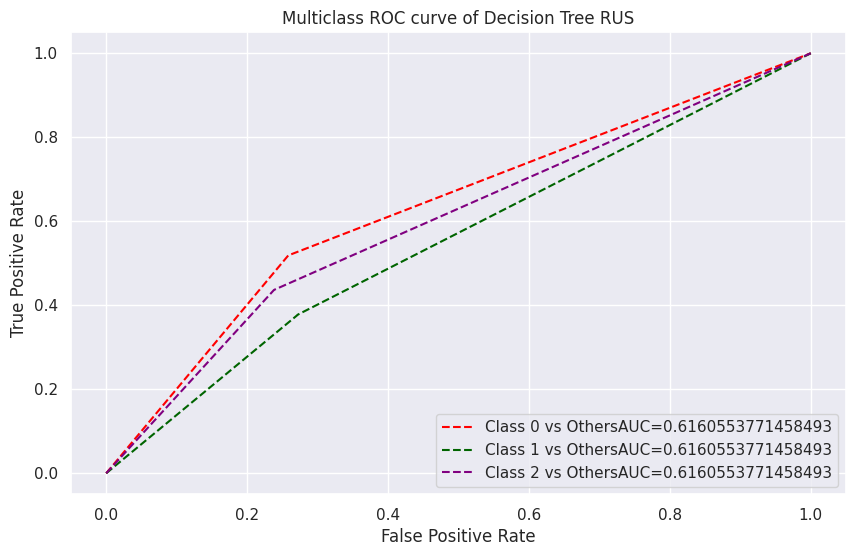

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[10439  2100   572]
 [ 1526   937   297]
 [  275   226    92]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     13111
           1       0.29      0.34      0.31      2760
           2       0.10      0.16      0.12       593

    accuracy                           0.70     16464
   macro avg       0.41      0.43      0.42     16464
weighted avg       0.73      0.70      0.71     16464



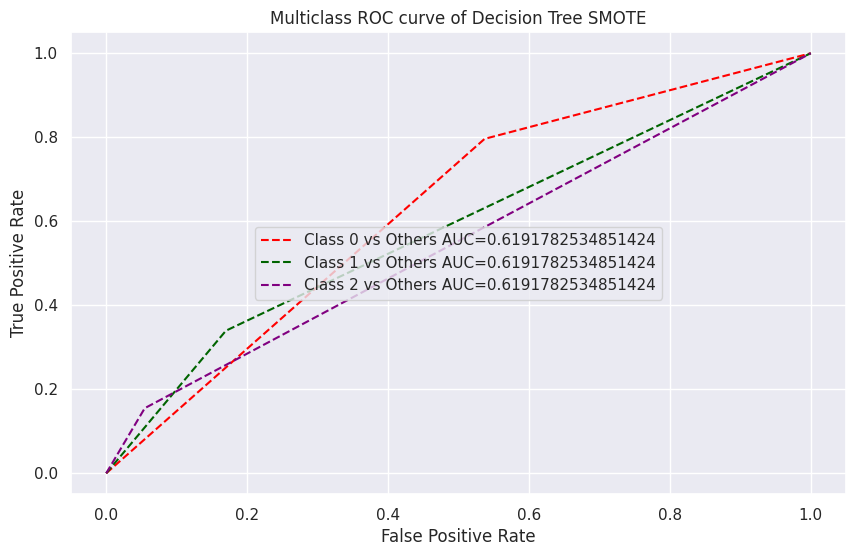

[{'Model_Name': 'Decision Tree RUS',
  'Train_Accuracy': 0.9992509363295881,
  'Train_Recall': 0.9992509363295881,
  'Train_Precision': 0.9992516720010637,
  'Train_F1score': 0.9992509360044148,
  'Train_AUC': 0.999999316163784,
  'Test_Accuracy': 0.491921768707483,
  'Test_Recall': 0.49192176870748305,
  'Test_Precision': 0.7453578087620965,
  'Test_F1score': 0.5716621868475139,
  'Test_AUC': 0.6160553771458493},
 {'Model_Name': 'Decision Tree SMOTE',
  'Train_Accuracy': 0.99944065900539,
  'Train_Recall': 0.99944065900539,
  'Train_Precision': 0.9994411905689436,
  'Train_F1score': 0.9994406980814767,
  'Train_AUC': 0.9999996637591636,
  'Test_Accuracy': 0.6965500485908649,
  'Test_Recall': 0.6965500485908649,
  'Test_Precision': 0.7307561728973953,
  'Test_F1score': 0.7122583187205846,
  'Test_AUC': 0.6191782534851424}]

In [85]:
#Evaluating the Decision Tree Model
decisiont_eval_list = evaluate_models('Decision Tree RUS','Decision Tree SMOTE', decisiont_rus, decisiont_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test,)
decisiont_eval_list

In [86]:
#Adding the Evaluaton results to the logistic regression list
add_list_to_final_df(decisiont_eval_list)


In [87]:
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0      LogisticReg RUS        0.535581      0.535581         0.524295   
1    LogisticReg SMOTE        0.543247      0.543247         0.530364   
2    Decision Tree RUS        0.999251      0.999251         0.999252   
3  Decision Tree SMOTE        0.999441      0.999441         0.999441   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.510560   0.725259       0.616800     0.616800        0.767009   
1       0.517134   0.726923       0.621295     0.621295        0.765723   
2       0.999251   0.999999       0.491922     0.491922        0.745358   
3       0.999441   1.000000       0.696550     0.696550        0.730756   

   Test_F1score  Test_AUC  
0      0.673500  0.767972  
1      0.675791  0.770763  
2      0.571662  0.616055  
3      0.712258  0.619178

### **Observation:**
*From the given dataset, it can be concluded that both Logistic Regression with Random Undersampling (RUS) and Logistic Regression with SMOTE have almost similar performances in terms of accuracy, recall, precision, F1 score, and AUC. However, the Decision Tree with SMOTE has a better overall performance than Decision Tree with RUS, with higher accuracy, recall, precision, F1 score, and AUC. Hence, Decision Tree with SMOTE can be considered as the best model among the four models for this dataset.*

*It is evident that Decision Tree models are exhibiting overfitting. In both datasets, whether undersampled or oversampled using SMOTE, they perform well on the training data but not on the testing data.*

### **ML Model - 3- Random Forest Model:**





#### **Explain the ML Model used**-
*A random forest model will be built to avoid overfitting. This model generates a number of decision trees and then combines them to produce a more precise and consistent prediction. Overfitting can also occur in ensemble models with only one tree because it is equivalent to a single decision tree. The risk of overfitting is reduced, however, by adding more trees to the random forest model.*

In [88]:
#RUS
randomforest_rus = RandomForestClassifier(random_state=50, max_depth=5, n_estimators=100, oob_score=True)
randomforest_rus.fit(x_train_rus,y_train_rus)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=50)

In [89]:
#SMOTE
randomforest_smote = RandomForestClassifier(random_state=50, max_depth=5, n_estimators=100, oob_score=True)
randomforest_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=50)

### **Evaluation metric Score Chart.**

----- Evaluation on Random Undersampled data -----Random Forest RUS------
--------------Test data ---------------

Confusion matrix 

[[9605 1521 1985]
 [ 906  624 1230]
 [ 121   83  389]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81     13111
           1       0.28      0.23      0.25      2760
           2       0.11      0.66      0.19       593

    accuracy                           0.64     16464
   macro avg       0.43      0.54      0.41     16464
weighted avg       0.77      0.64      0.69     16464



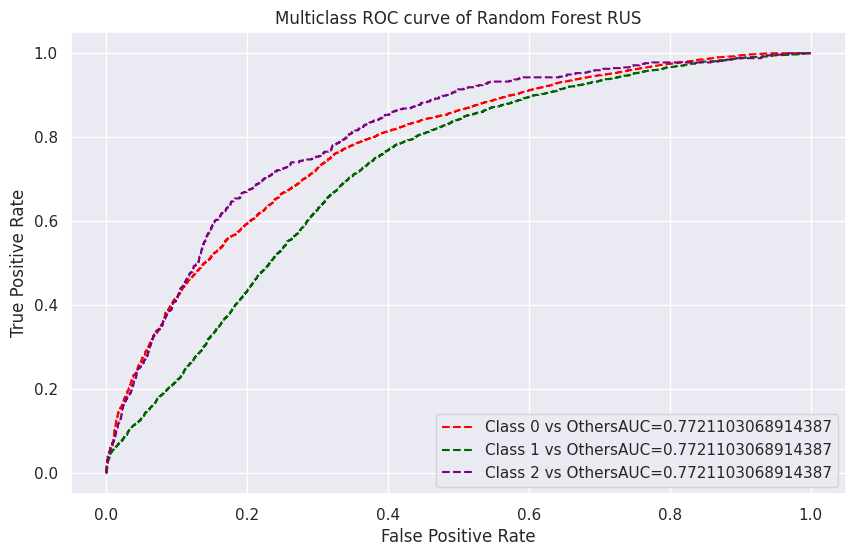

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[10131  1329  1651]
 [  996   661  1103]
 [  135   101   357]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     13111
           1       0.32      0.24      0.27      2760
           2       0.11      0.60      0.19       593

    accuracy                           0.68     16464
   macro avg       0.44      0.54      0.43     16464
weighted avg       0.77      0.68      0.71     16464



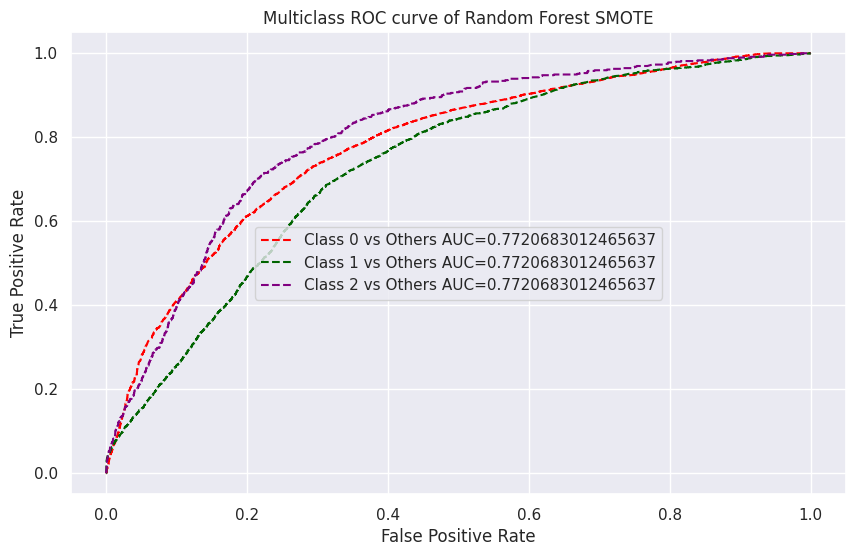

[{'Model_Name': 'Random Forest RUS',
  'Train_Accuracy': 0.5685393258426966,
  'Train_Recall': 0.5685393258426966,
  'Train_Precision': 0.5643260840363472,
  'Train_F1score': 0.5469741257129592,
  'Train_AUC': 0.7544613474729621,
  'Test_Accuracy': 0.6449222546161322,
  'Test_Recall': 0.6449222546161322,
  'Test_Precision': 0.7702590239021747,
  'Test_F1score': 0.6929259842085718,
  'Test_AUC': 0.7721103068914387},
 {'Model_Name': 'Random Forest SMOTE',
  'Train_Accuracy': 0.5660191870910878,
  'Train_Recall': 0.5660191870910878,
  'Train_Precision': 0.5536218178143824,
  'Train_F1score': 0.5394881700309543,
  'Train_AUC': 0.7586250970592949,
  'Test_Accuracy': 0.6771744412050534,
  'Test_Recall': 0.6771744412050534,
  'Test_Precision': 0.7734963058954162,
  'Test_F1score': 0.71465209348392,
  'Test_AUC': 0.7720683012465637}]

In [90]:
#Random Forest Evaluation
randomforest_eval_list = evaluate_models('Random Forest RUS', 'Random Forest SMOTE', randomforest_rus, randomforest_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
randomforest_eval_list

In [91]:
#Adding the Evaluaton results to the logistic regression list
add_list_to_final_df(randomforest_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0      LogisticReg RUS        0.535581      0.535581         0.524295   
1    LogisticReg SMOTE        0.543247      0.543247         0.530364   
2    Decision Tree RUS        0.999251      0.999251         0.999252   
3  Decision Tree SMOTE        0.999441      0.999441         0.999441   
4    Random Forest RUS        0.568539      0.568539         0.564326   
5  Random Forest SMOTE        0.566019      0.566019         0.553622   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.510560   0.725259       0.616800     0.616800        0.767009   
1       0.517134   0.726923       0.621295     0.621295        0.765723   
2       0.999251   0.999999       0.491922     0.491922        0.745358   
3       0.999441   1.000000       0.696550     0.696550        0.730756   
4       0.546974   0.754461       0.644922     0.644922        0.770259   
5       0.539488   0.758625       0.677174     0.677174        0.773496   

   Test_F1score  Test_AUC  
0      0.673500  0.767972  
1      0.675791  0.770763  
2      0.571662  0.616055  
3      0.712258  0.619178  
4      0.692926  0.772110  
5      0.714652  0.772068

### **Observation:**
*Based on the given results, it can be concluded that the decision tree models (both with RUS and SMOTE) performed well in terms of training accuracy, recall, precision, and F1 score but did not generalize well on the test set. The logistic regression models (with RUS and SMOTE) had similar performance on the test set, but the SMOTE technique outperformed RUS in most of the evaluation metrics. The random forest models (with RUS and SMOTE) had higher test set performance compared to the logistic regression models but had lower performance compared to the decision tree models. Overall, the SMOTE technique appeared to perform better than RUS in most cases.*

### **Cross- Validation & Hyperparameter Tuning**

In [92]:
#classifier
randomforest = RandomForestClassifier(random_state=50, n_jobs=-1)

In [93]:
#Parameter dictionary
params = {'max_depth': [3,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,25,30,50,100,200]}

In [94]:
# Performing the Grid Search to get the best parameters
grid_search = GridSearchCV(estimator=randomforest, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")

In [95]:
#Fitting RUS to grid 
grid_search.fit(x_train_rus,y_train_rus)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [96]:
#optimal model
randomforest_tuned_rus = grid_search.best_estimator_

In [97]:
#Fitting SMOTE
grid_search_smote = GridSearchCV(estimator=randomforest, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote.fit(x_train_smote,y_train_smote)
#optimal smote model
rf_tuned_smote = grid_search_smote.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


### **Evaluation metric Score Chart.**

----- Evaluation on Random Undersampled data -----RandomF Tuned RUS------
--------------Test data ---------------

Confusion matrix 

[[9340 1877 1894]
 [ 833  752 1175]
 [ 108  117  368]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     13111
           1       0.27      0.27      0.27      2760
           2       0.11      0.62      0.18       593

    accuracy                           0.64     16464
   macro avg       0.43      0.54      0.42     16464
weighted avg       0.77      0.64      0.69     16464



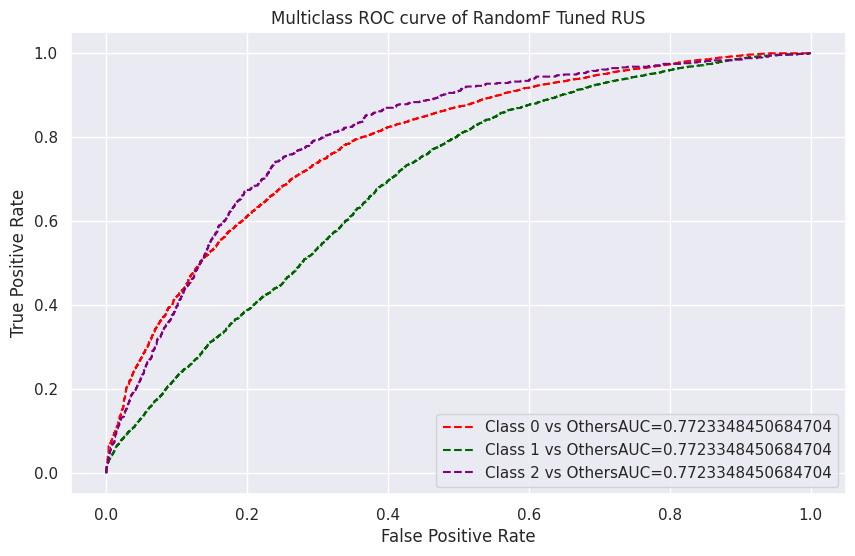

----- Evaluation on SMOTE data -------RandomF Tuned SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[11096  1541   474]
 [ 1329  1082   349]
 [  223   273    97]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     13111
           1       0.37      0.39      0.38      2760
           2       0.11      0.16      0.13       593

    accuracy                           0.75     16464
   macro avg       0.45      0.47      0.46     16464
weighted avg       0.77      0.75      0.75     16464



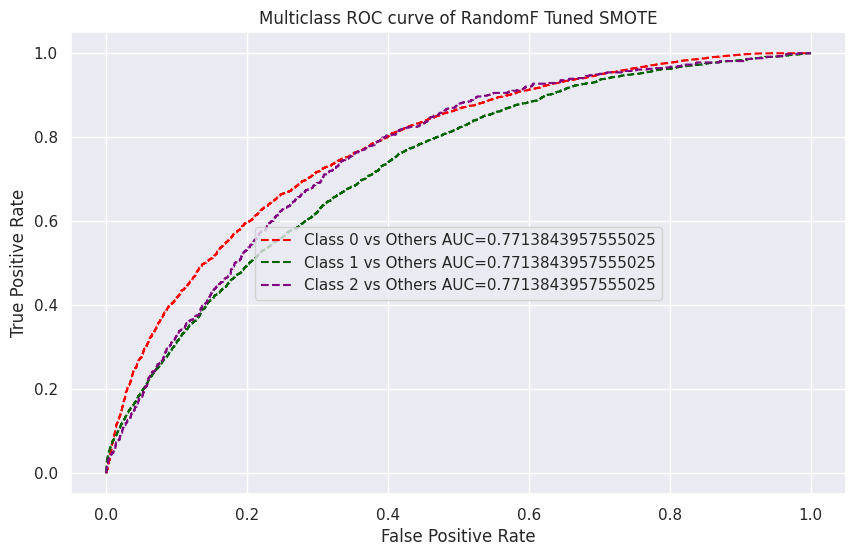

[{'Model_Name': 'RandomF Tuned RUS',
  'Train_Accuracy': 0.6668539325842696,
  'Train_Recall': 0.6668539325842696,
  'Train_Precision': 0.6736786591474638,
  'Train_F1score': 0.6608642162401879,
  'Train_AUC': 0.8585458485881413,
  'Test_Accuracy': 0.6353255587949466,
  'Test_Recall': 0.6353255587949466,
  'Test_Precision': 0.7732204875515228,
  'Test_F1score': 0.6883004955063379,
  'Test_AUC': 0.7723348450684704},
 {'Model_Name': 'RandomF Tuned SMOTE',
  'Train_Accuracy': 0.9027848401640733,
  'Train_Recall': 0.9027848401640733,
  'Train_Precision': 0.9027089267719424,
  'Train_F1score': 0.9021927899373251,
  'Train_AUC': 0.982574955367471,
  'Test_Accuracy': 0.7455660835762876,
  'Test_Recall': 0.7455660835762876,
  'Test_Precision': 0.765056927973528,
  'Test_F1score': 0.7548263819891085,
  'Test_AUC': 0.7713843957555025}]

In [98]:
#Model Evaluation for Random Forest Hyperparameter 
randomforest_tuned_list = evaluate_models('RandomF Tuned RUS', 'RandomF Tuned SMOTE', randomforest_tuned_rus, rf_tuned_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
randomforest_tuned_list

In [99]:
#Adding the Evaluaton results to the logistic regression list
add_list_to_final_df(randomforest_tuned_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0      LogisticReg RUS        0.535581      0.535581         0.524295   
1    LogisticReg SMOTE        0.543247      0.543247         0.530364   
2    Decision Tree RUS        0.999251      0.999251         0.999252   
3  Decision Tree SMOTE        0.999441      0.999441         0.999441   
4    Random Forest RUS        0.568539      0.568539         0.564326   
5  Random Forest SMOTE        0.566019      0.566019         0.553622   
6    RandomF Tuned RUS        0.666854      0.666854         0.673679   
7  RandomF Tuned SMOTE        0.902785      0.902785         0.902709   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.510560   0.725259       0.616800     0.616800        0.767009   
1       0.517134   0.726923       0.621295     0.621295        0.765723   
2       0.999251   0.999999       0.491922     0.491922        0.745358   
3       0.999441   1.000000       0.696550     0.696550        0.730756   
4       0.546974   0.754461       0.644922     0.644922        0.770259   
5       0.539488   0.758625       0.677174     0.677174        0.773496   
6       0.660864   0.858546       0.635326     0.635326        0.773220   
7       0.902193   0.982575       0.745566     0.745566        0.765057   

   Test_F1score  Test_AUC  
0      0.673500  0.767972  
1      0.675791  0.770763  
2      0.571662  0.616055  
3      0.712258  0.619178  
4      0.692926  0.772110  
5      0.714652  0.772068  
6      0.688300  0.772335  
7      0.754826  0.771384

### **Observation**
* For Logistic Regression, SMOTE provided better results in terms of all evaluation metrics as compared to RUS.
* For Decision Tree, SMOTE gave better results in terms of recall, F1-score, and AUC, but RUS provided better precision and accuracy.
* For Random Forest, both RUS and SMOTE provided almost similar results in terms of all evaluation metrics. However, the Random Forest model with SMOTE had slightly better recall and precision as compared to the RUS model.
* For the Random Forest model with tuned hyperparameters, SMOTE gave better results in terms of all evaluation metrics as compared to RUS.

In [100]:
#feature importance of random forest 
feature_imp = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": rf_tuned_smote.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)

In [101]:
feature_imp

Variable  Importance
1                        Total_Past_Communications    0.246159
2                                       Word_Count    0.208764
0                            Subject_Hotness_Score    0.193745
3                                  Total_Img_links    0.179819
7          Email_Campaign_Type_-0.5816884687272418    0.065845
8           Email_Campaign_Type_1.5611259916426456    0.025428
4                                     Email_Type_1    0.021997
5                              Email_Source_Type_1    0.018199
10  Time_Email_sent_Category_0.0007936159559881541    0.011248
9     Time_Email_sent_Category_-1.5829511956077373    0.010580
11     Time_Email_sent_Category_1.5845384275197136    0.010318
6           Email_Campaign_Type_-2.724502929097129    0.007898

***Visulization of feature importance through Bar plot***

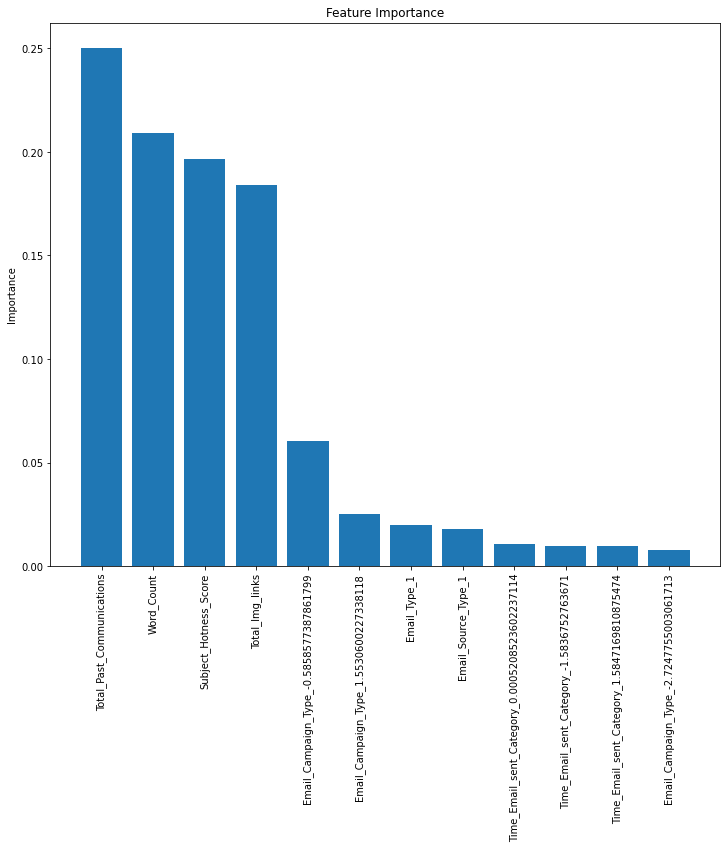

In [ ]:
variable_names = feature_imp['Variable']
importance_values = feature_imp['Importance']

fig, ax = plt.subplots(figsize=(12,10))
ax.bar(variable_names, importance_values)
plt.xticks(rotation=90)
ax.set_ylabel('Importance')
ax.set_title('Feature Importance')
plt.show()



## ***Feature Selection***

*Feature selection is the process of selecting a subset of relevant features or variables from a larger set of features in a dataset. It is a critical step in machine learning and data analysis, as it helps to improve the accuracy and efficiency of a predictive model by reducing the dimensionality of the data and removing irrelevant or redundant features.*

In [102]:
#RUS
#Grid Search to get the best parameters
grid_search_rus = GridSearchCV(estimator=randomforest, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
#Fitting RUS to grid search
grid_search_rus.fit(x_train_rus,y_train_rus)
#optimal model
randomforest_tuned_rus1 = grid_search_rus.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


In [103]:
#Fitting SMOTE
grid_search_smote1 = GridSearchCV(estimator=randomforest, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote1.fit(x_train_smote,y_train_smote)
#optimal smote model
rf_tuned_smote1 = grid_search_smote1.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


----- Evaluation on Random Undersampled data -----RandomF Tuned RUS FSel------
--------------Test data ---------------

Confusion matrix 

[[9340 1877 1894]
 [ 833  752 1175]
 [ 108  117  368]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     13111
           1       0.27      0.27      0.27      2760
           2       0.11      0.62      0.18       593

    accuracy                           0.64     16464
   macro avg       0.43      0.54      0.42     16464
weighted avg       0.77      0.64      0.69     16464



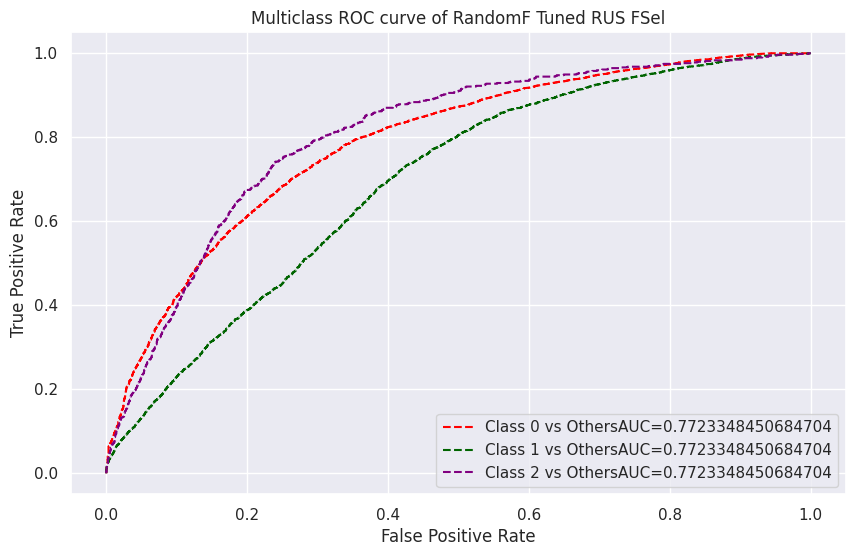

----- Evaluation on SMOTE data -------RandomF Tuned SMOTE FSel-----
---------------Test data ---------------

Confusion matrix 

[[11096  1541   474]
 [ 1329  1082   349]
 [  223   273    97]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     13111
           1       0.37      0.39      0.38      2760
           2       0.11      0.16      0.13       593

    accuracy                           0.75     16464
   macro avg       0.45      0.47      0.46     16464
weighted avg       0.77      0.75      0.75     16464



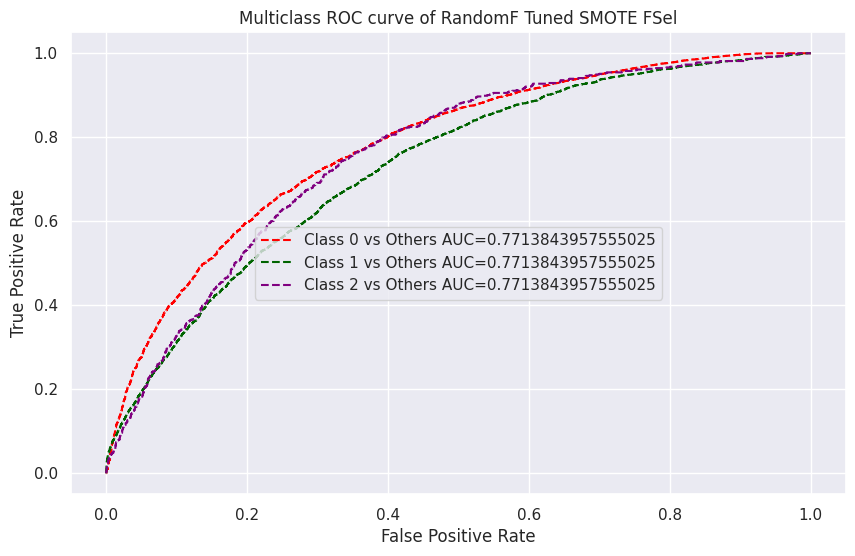

[{'Model_Name': 'RandomF Tuned RUS FSel',
  'Train_Accuracy': 0.6668539325842696,
  'Train_Recall': 0.6668539325842696,
  'Train_Precision': 0.6736786591474638,
  'Train_F1score': 0.6608642162401879,
  'Train_AUC': 0.8585458485881413,
  'Test_Accuracy': 0.6353255587949466,
  'Test_Recall': 0.6353255587949466,
  'Test_Precision': 0.7732204875515228,
  'Test_F1score': 0.6883004955063379,
  'Test_AUC': 0.7723348450684704},
 {'Model_Name': 'RandomF Tuned SMOTE FSel',
  'Train_Accuracy': 0.9027848401640733,
  'Train_Recall': 0.9027848401640733,
  'Train_Precision': 0.9027089267719424,
  'Train_F1score': 0.9021927899373251,
  'Train_AUC': 0.982574955367471,
  'Test_Accuracy': 0.7455660835762876,
  'Test_Recall': 0.7455660835762876,
  'Test_Precision': 0.765056927973528,
  'Test_F1score': 0.7548263819891085,
  'Test_AUC': 0.7713843957555025}]

In [104]:
#Model Evaluation for Random Forest Hyperparameter with feature selection  
rf_tuned_list1 = evaluate_models('RandomF Tuned RUS FSel', 'RandomF Tuned SMOTE FSel', randomforest_tuned_rus1, rf_tuned_smote1,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
rf_tuned_list1

In [112]:
#adding list
add_list_to_final_df(rf_tuned_list1)
#Taking a look of our final comparison dataframe
comparison_df


Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0           LogisticReg RUS        0.535581      0.535581         0.524295   
1         LogisticReg SMOTE        0.543247      0.543247         0.530364   
2         Decision Tree RUS        0.999251      0.999251         0.999252   
3       Decision Tree SMOTE        0.999441      0.999441         0.999441   
4         Random Forest RUS        0.568539      0.568539         0.564326   
5       Random Forest SMOTE        0.566019      0.566019         0.553622   
6         RandomF Tuned RUS        0.666854      0.666854         0.673679   
7       RandomF Tuned SMOTE        0.902785      0.902785         0.902709   
8    RandomF Tuned RUS FSel        0.666854      0.666854         0.673679   
9  RandomF Tuned SMOTE FSel        0.902785      0.902785         0.902709   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.510560   0.725259       0.616800     0.616800        0.767009   
1       0.517134   0.726923       0.621295     0.621295        0.765723   
2       0.999251   0.999999       0.491922     0.491922        0.745358   
3       0.999441   1.000000       0.696550     0.696550        0.730756   
4       0.546974   0.754461       0.644922     0.644922        0.770259   
5       0.539488   0.758625       0.677174     0.677174        0.773496   
6       0.660864   0.858546       0.635326     0.635326        0.773220   
7       0.902193   0.982575       0.745566     0.745566        0.765057   
8       0.660864   0.858546       0.635326     0.635326        0.773220   
9       0.902193   0.982575       0.745566     0.745566        0.765057   

   Test_F1score  Test_AUC  
0      0.673500  0.767972  
1      0.675791  0.770763  
2      0.571662  0.616055  
3      0.712258  0.619178  
4      0.692926  0.772110  
5      0.714652  0.772068  
6      0.688300  0.772335  
7      0.754826  0.771384  
8      0.688300  0.772335  
9      0.754826  0.771384

### **Observation**

*Based on the given table, it appears that the Random Forest with SMOTE technique applied and tuned hyperparameters, and feature selection has the best performance in terms of test accuracy, recall, precision, F1 score, and AUC. The Logistic Regression and Decision Tree models do not perform as well as the Random Forest models. It is also worth noting that the Decision Tree models appear to be overfitting the training data, as evidenced by the very high training performance and relatively low test performance. Overall, it seems that using the SMOTE technique to address class imbalance and tuning hyperparameters can lead to improved model performance in this particular dataset.*

### **ML-MODEL- 4 XGBOOST**

In [105]:
#importing
from xgboost import XGBClassifier

In [106]:
xgb_rus = XGBClassifier(n_estimators=100, max_depth=12, min_child_weight=1, subsample=0.8)
xgb_rus.fit(x_train_rus, y_train_rus)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [107]:
xgb_smote = XGBClassifier(n_estimators=100, max_depth=12, min_child_weight=1, subsample=0.8)
xgb_smote.fit(x_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### **Evaluation metric Score Chart.**

----- Evaluation on Random Undersampled data -----XGB RUS------
--------------Test data ---------------

Confusion matrix 

[[8181 2718 2212]
 [ 735  979 1046]
 [ 103  184  306]]
              precision    recall  f1-score   support

           0       0.91      0.62      0.74     13111
           1       0.25      0.35      0.29      2760
           2       0.09      0.52      0.15       593

    accuracy                           0.57     16464
   macro avg       0.42      0.50      0.39     16464
weighted avg       0.77      0.57      0.64     16464



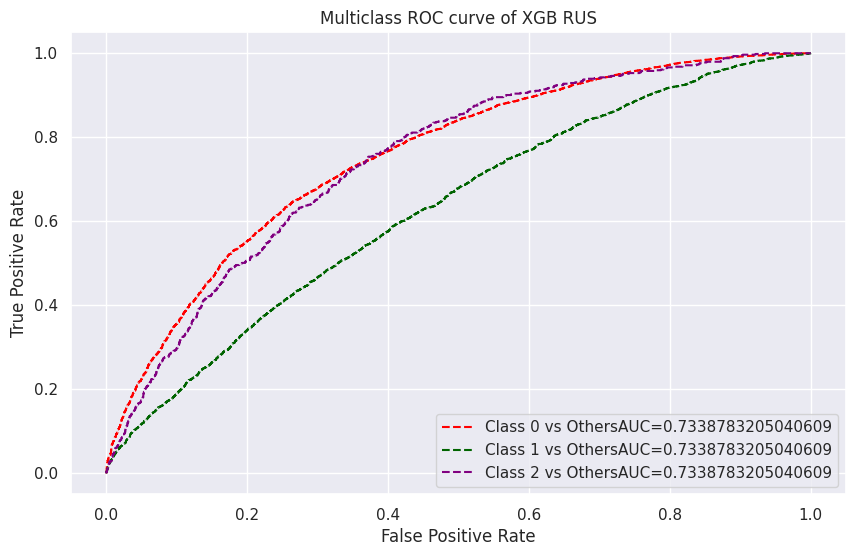

----- Evaluation on SMOTE data -------XGB SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[12425   588    98]
 [ 1924   696   140]
 [  367   183    43]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     13111
           1       0.47      0.25      0.33      2760
           2       0.15      0.07      0.10       593

    accuracy                           0.80     16464
   macro avg       0.49      0.42      0.44     16464
weighted avg       0.76      0.80      0.77     16464



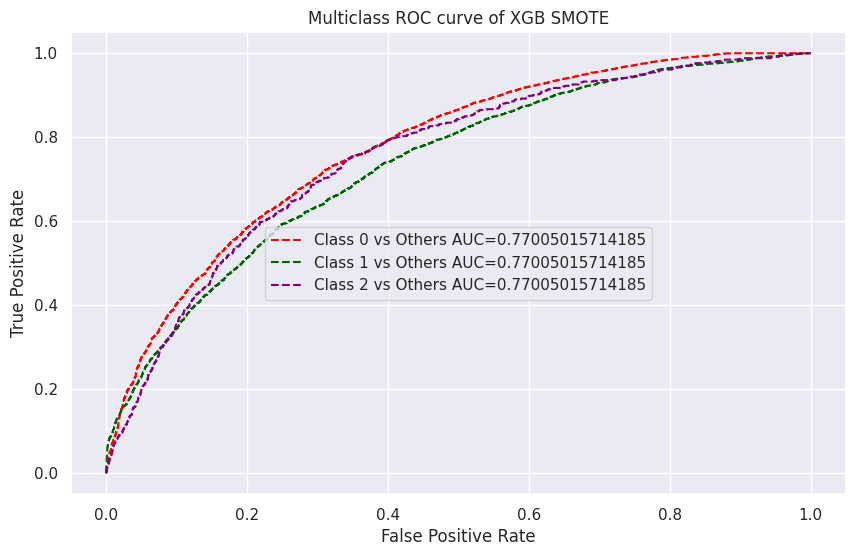

[{'Model_Name': 'XGB RUS',
  'Train_Accuracy': 0.9992509363295881,
  'Train_Recall': 0.9992509363295881,
  'Train_Precision': 0.9992516720010637,
  'Train_F1score': 0.9992509360044148,
  'Train_AUC': 0.999999316163784,
  'Test_Accuracy': 0.5749514091350826,
  'Test_Recall': 0.5749514091350826,
  'Test_Precision': 0.7677313386253246,
  'Test_F1score': 0.6435115680978897,
  'Test_AUC': 0.7338783205040609},
 {'Model_Name': 'XGB SMOTE',
  'Train_Accuracy': 0.9722702464490321,
  'Train_Recall': 0.9722702464490321,
  'Train_Precision': 0.973250658891201,
  'Train_F1score': 0.9722281798860091,
  'Train_AUC': 0.9985196783862454,
  'Test_Accuracy': 0.7995626822157434,
  'Test_Recall': 0.7995626822157434,
  'Test_Precision': 0.7574137181690384,
  'Test_F1score': 0.7698981681986936,
  'Test_AUC': 0.77005015714185}]

In [108]:
#model evaluation of XGB
xgb_eval_list = evaluate_models('XGB RUS', 'XGB SMOTE',xgb_rus, xgb_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
xgb_eval_list

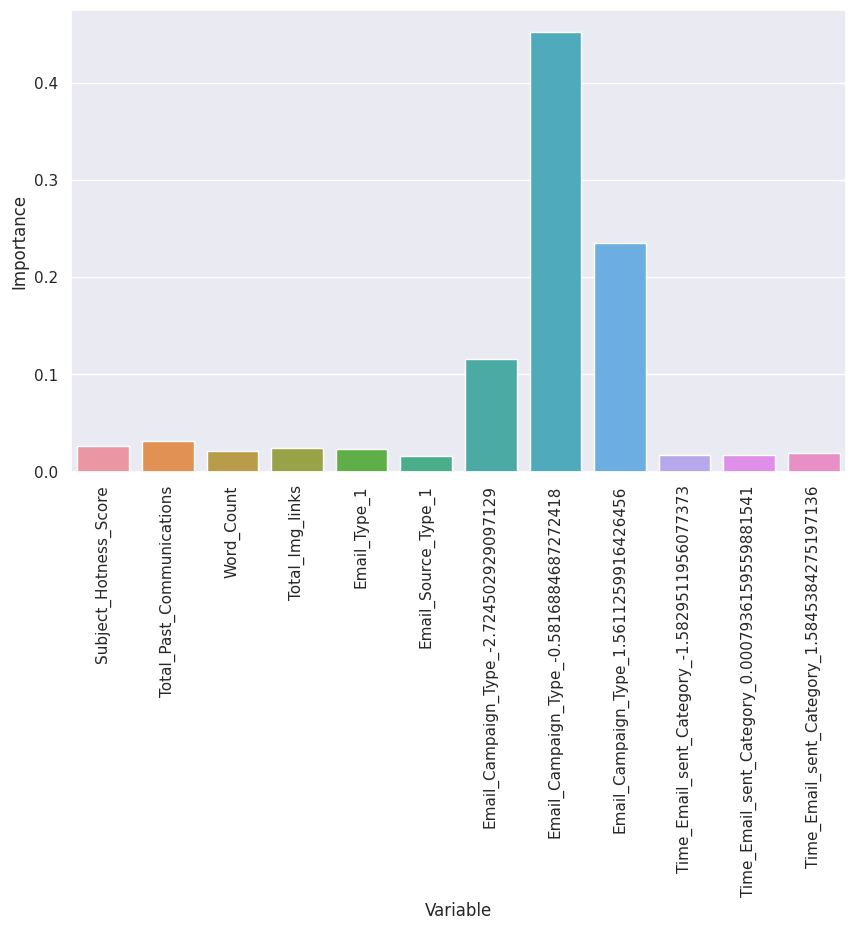

In [111]:
#visualising feature importance of XGB
feature_imp_xgb = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": xgb_smote.feature_importances_})
sns.barplot(x=feature_imp_xgb['Variable'], y=feature_imp_xgb['Importance'])
plt.xticks(rotation=90)
plt.show()


In [117]:
#addition to the list
add_list_to_final_df(xgb_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0            LogisticReg RUS        0.535581      0.535581         0.524295   
1          LogisticReg SMOTE        0.543247      0.543247         0.530364   
2          Decision Tree RUS        0.999251      0.999251         0.999252   
3        Decision Tree SMOTE        0.999441      0.999441         0.999441   
4          Random Forest RUS        0.568539      0.568539         0.564326   
5        Random Forest SMOTE        0.566019      0.566019         0.553622   
6          RandomF Tuned RUS        0.666854      0.666854         0.673679   
7        RandomF Tuned SMOTE        0.902785      0.902785         0.902709   
8     RandomF Tuned RUS FSel        0.666854      0.666854         0.673679   
9   RandomF Tuned SMOTE FSel        0.902785      0.902785         0.902709   
10                   XGB RUS        0.999251      0.999251         0.999252   
11                 XGB SMOTE        0.972270      0.972270         0.973251   
12                   XGB RUS        0.999251      0.999251         0.999252   
13                 XGB SMOTE        0.972270      0.972270         0.973251   

    Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0        0.510560   0.725259       0.616800     0.616800        0.767009   
1        0.517134   0.726923       0.621295     0.621295        0.765723   
2        0.999251   0.999999       0.491922     0.491922        0.745358   
3        0.999441   1.000000       0.696550     0.696550        0.730756   
4        0.546974   0.754461       0.644922     0.644922        0.770259   
5        0.539488   0.758625       0.677174     0.677174        0.773496   
6        0.660864   0.858546       0.635326     0.635326        0.773220   
7        0.902193   0.982575       0.745566     0.745566        0.765057   
8        0.660864   0.858546       0.635326     0.635326        0.773220   
9        0.902193   0.982575       0.745566     0.745566        0.765057   
10       0.999251   0.999999       0.574951     0.574951        0.767731   
11       0.972228   0.998520       0.799563     0.799563        0.757414   
12       0.999251   0.999999       0.574951     0.574951        0.767731   
13       0.972228   0.998520       0.799563     0.799563        0.757414   

    Test_F1score  Test_AUC  
0       0.673500  0.767972  
1       0.675791  0.770763  
2       0.571662  0.616055  
3       0.712258  0.619178  
4       0.692926  0.772110  
5       0.714652  0.772068  
6       0.688300  0.772335  
7       0.754826  0.771384  
8       0.688300  0.772335  
9       0.754826  0.771384  
10      0.643512  0.733878  
11      0.769898  0.770050  
12      0.643512  0.733878  
13      0.769898  0.770050

### **Observation**

*Based on the performance metrics shown in the table, it appears that the Random Forest models and the XGBoost model are the best performing models. The Random Forest and XGBoost models both have high accuracy, recall, precision, and F1 score on the test data, as well as high AUC scores. Additionally, the Random Forest and XGBoost models that were tuned using feature selection have slightly better performance than their counterparts that were not tuned.*

In [119]:
#sorting values
comparison_df.sort_values(by=["Test_F1score",'Test_AUC'], ascending=(False,False), inplace = True, ignore_index = True)
comparison_df.head(5)

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0                 XGB SMOTE        0.972270      0.972270         0.973251   
1                 XGB SMOTE        0.972270      0.972270         0.973251   
2       RandomF Tuned SMOTE        0.902785      0.902785         0.902709   
3  RandomF Tuned SMOTE FSel        0.902785      0.902785         0.902709   
4       Random Forest SMOTE        0.566019      0.566019         0.553622   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.972228   0.998520       0.799563     0.799563        0.757414   
1       0.972228   0.998520       0.799563     0.799563        0.757414   
2       0.902193   0.982575       0.745566     0.745566        0.765057   
3       0.902193   0.982575       0.745566     0.745566        0.765057   
4       0.539488   0.758625       0.677174     0.677174        0.773496   

   Test_F1score  Test_AUC  
0      0.769898  0.770050  
1      0.769898  0.770050  
2      0.754826  0.771384  
3      0.754826  0.771384  
4      0.714652  0.772068

# **Conclusion**

1. **Logistic Regression**-* The evaluation results of the logistic regression model trained on Random Undersampled data and SMOTE data show similar performance on the test data. The accuracy, precision, recall, and F1-score are around 0.62, which indicates that the model has low predictive power.*

2. **Decision Tree**- * The Decision Tree model overfit the training data, leading to poor performance on the test data. Hyperparameter tuning did not result in significant improvements in the results.*

3. **Random Forest**- *The Random Forest models had similar accuracy scores on both random undersampled and SMOTE data, but the performance on the minority classes was relatively low. The Random Forest model with random undersampled data had an accuracy of 0.64, and the model with SMOTE data had an accuracy of 0.68.*

4. **Random Forest model with feature selection and hyperparameter tuning** -*Based on the evaluation results, it appears that the Random Forest model with feature selection and hyperparameter tuning on the SMOTE data performed the best with an F1 score of 0.75 on the test set. This model was able to correctly classify the majority class (class 0) with high precision and recall, while also improving the performance on the minority classes (class 1 and class 2) compared to the other models. However, it is important to note that the F1 scores for the minority classes are still relatively low, indicating that there is room for further improvement*

5. **XG Boost**- *The evaluation shows that using SMOTE data augmentation technique for handling imbalanced classes results in better performance of the XGBoost model compared to Random Undersampling technique. The SMOTE model achieved an F1 score of 0.77 on the test set, while the Random Undersampling model achieved an F1 score of 0.64, indicating a significant improvement in performance.*



# **Evaluation Metrics and Future Recommendations**



* *Based on the evaluation results, we can conclude that the XGBoost model with SMOTE data and feature selection performed the best, with an accuracy of 0.80 on the test data. This model had higher precision, recall, and F1-scores for all classes compared to other models. The XGBoost model with random undersampled data also performed reasonably well with an accuracy of 0.57, but the performance was much lower for the minority classes.*


* *On the other hand, the Decision Tree RUS  model has the lowest Test_F1score and Test_AUC values of 0.571662 and 0.616055 respectively, making it the least performing model in this comparison.*

**Recommendations:**

* *We came to a conclusion and mentioned some factors that are leading to a higher number of ignored emails based on this in-depth exploratory data analysis and feature importance of various good models, and here are some recommendations as a result.*

* *Email Marketing Campaign Types 1 and 3 fare better than type 2. So concentrating on improving 2 may suffice.*

* *The word count should be appropriate. The content should be concise and to the point, with a few marketing gimmicks thrown in for good measure.*

* *Keeping the number of images and links to a minimum.*

* *Total previous communications had a positive influence, so having a healthy relationship with customers is a good thing.*

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***